# DATA ANALYSIS

## Use Case: Customer Churn Analysis
Finding out factors that affect the customer churn from a telecommunications service provider, with "churn" being referred to as "the state where the customer does not pay their monthly subscription and their service being terminated.

## Datasets and Their Data Dictionary
There are two datasets namely *accounts.csv* and *billing.csv*. Both datasets share the same CustomerID field, which is a unique identifier for each customer in the systems.

#### Accounts (cca_accounts.csv)

  From the Customer Care department, this is the list of all of our customers with the following data fields:

   * **Region:** the region the customer is located in
   * **Gender:** the customer’s gender
   * **Partner:** if the customer lives with a partner or is married
   * **Dependents:** if the customer has any children/dependents
   * **Tenure:** the length of time (in months) this customer has been with the telecom
   * **CustomerServiceCalls:** the number of calls a customer placed to Customer Care in the past month

#### Billing (cca_billing.csv)

   From the Credit and Collections department, this is the list of all of our customers’ service plans and billing-related information:

   * **PhoneService:** if the customer has phone service
   * **InternetService:** the kind of Internet service of the customer (if any)
   * **OnlineSecurity:** (0,1) if the customer has a security package
   * **StreamingTV:** (0,1) if the customer has a streaming TV package
   * **LockedIn:** (0,1) if the customer will suffer a penalty fee if they terminate service or if their contract term no longer includes this fee
   * **PaperlessBilling:** (0,1) if the customer is enrolled in paperless billing
   * **DominantPaymentMethod:** from historical data, the most common kind of payment method the customer uses to pay their bill
   * **MonthlyCharges:** the amount (in Pesos) a customer owes every month
   * **Churn:** (0,1) if a customer churned in the current month, as prev. defined

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

Python Libraries Imported:
* Numpy - 
* Pandas - 
* Seaborn - 
* Matplotlib - 

In [2]:
#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

# Set Options for display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

## Loading the Datasets

In [3]:
df_a = pd.read_csv('cca_accounts.csv') 
df_b = pd.read_csv('cca_billing.csv')

## Exploratory Data Analysis (EDA) and Data Preparation

EDA is done to get a grasp on what the dataset is all about. These also involves the following steps:

* Checking the shape of dataset
* Checking if both datasets share the same CustomerID to be able to merge easily 
(assuming that it is raw and still needs to be checked) 
* Changing dataset into machine-readable

### Describing the Data
In this part, we take an initial look on our datasets in order to have an initial insight in the dataset.

#### Accounts dataset

In [4]:
#Viewing a sample of the data to check if it is loaded properly and to get a grasp what the data is all about
df_a.head()

,customerID,Region,Gender,Partner,Dependents,Tenure,CustomerServiceCalls
0,7892-POOKP,National Capital Region,Female,1,0,28,1
1,0280-XJGEX,National Capital Region,Male,0,0,4900,6
2,8779-QRDMV,National Capital Region,Male,0,0,1,5
3,1066-JKSGK,National Capital Region,Male,0,0,1,3
4,8665-UTDHZ,National Capital Region,Male,1,1,1,3


In [5]:
#Checking the descriptive statistics of the dataset
df_a.describe()

,Partner,Dependents,Tenure,CustomerServiceCalls
count,7043.00,7043.00,7043.00,7043.00
mean,0.48,0.30,33.06,1.35
std,0.50,0.46,62.99,1.37
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,9.00,1.00
50%,0.00,0.00,29.00,1.00
75%,1.00,1.00,55.00,2.00
max,1.00,1.00,4900.00,7.00


In [6]:
#Checking the features and its column names, datatypes, null values, and counts 
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
customerID              7043 non-null object
Region                  7043 non-null object
Gender                  7043 non-null object
Partner                 7043 non-null int64
Dependents              7043 non-null int64
Tenure                  7043 non-null int64
CustomerServiceCalls    7043 non-null int64
dtypes: int64(4), object(3)
memory usage: 385.2+ KB


In [7]:
#Checking the dimensions of the dataset
df_a.shape

(7043, 7)

In [8]:
#Sorting the datasets in ascending order based on the CustomerID
df_a.sort_values(["customerID"], axis=0,ascending=True, inplace=True) 
df_a.head(20)

,customerID,Region,Gender,Partner,Dependents,Tenure,CustomerServiceCalls
2919,0002-ORFBO,North Luzon,Female,1,1,9,2
3961,0003-MKNFE,South Luzon,Male,0,0,9,1
512,0004-TLHLJ,South Luzon,Male,0,0,4,0
788,0011-IGKFF,NCR,Male,1,0,13,1
5757,0013-EXCHZ,Mindanao,Female,1,0,3,2
1976,0013-MHZWF,NCR,Female,0,1,9,1
2984,0013-SMEOE,North Luzon,Female,1,0,71,1
3205,0014-BMAQU,North Luzon,Male,1,0,63,1
2898,0015-UOCOJ,North Luzon,Female,0,0,7,1
5018,0016-QLJIS,Visayas,Female,1,1,65,0


In [9]:
#Checking for duplicated values
print('Train set duplicate IDs: {}'.format(df_a.duplicated().sum()))  

Train set duplicate IDs: 0


In [10]:
#Checking the tail or end of the dataset to see the last CustomerID recorded
df_a.tail(10)

,customerID,Region,Gender,Partner,Dependents,Tenure,CustomerServiceCalls
5216,9975-SKRNR,Visayas,Male,0,0,1,1
1534,9978-HYCIN,NCR,Male,1,1,47,1
6682,9979-RGMZT,Nor. Luz.,Female,0,0,7,0
5923,9985-MWVIX,Mindanao,Female,0,0,1,0
4079,9986-BONCE,South Luzon,Female,0,0,4,1
4059,9987-LUTYD,South Luzon,Female,0,0,13,1
3416,9992-RRAMN,North Luzon,Male,1,0,22,0
2015,9992-UJOEL,NCR,Male,0,0,2,1
2655,9993-LHIEB,North Luzon,Male,1,1,67,1
2338,9995-HOTOH,NCR,Male,1,1,63,1


In [11]:
#Setting our index of the dataset through their CustomerID, as its unique identifier
df_a.set_index('customerID')

,Region,Gender,Partner,Dependents,Tenure,CustomerServiceCalls
customerID,,,,,,
0002-ORFBO,North Luzon,Female,1,1,9,2
0003-MKNFE,South Luzon,Male,0,0,9,1
0004-TLHLJ,South Luzon,Male,0,0,4,0
0011-IGKFF,NCR,Male,1,0,13,1
0013-EXCHZ,Mindanao,Female,1,0,3,2
0013-MHZWF,NCR,Female,0,1,9,1
0013-SMEOE,North Luzon,Female,1,0,71,1
0014-BMAQU,North Luzon,Male,1,0,63,1
0015-UOCOJ,North Luzon,Female,0,0,7,1


#### Billing dataset

In [12]:
#Viewing a sample of the data to check if it is loaded properly and to get a grasp what the data is all about
df_b.head()

,customerID,PhoneService,InternetService,OnlineSecurity,StreamingTV,LockedIn,PaperlessBilling,DominantPaymentMethod,MonthlyCharges,Churn
0,8905-IAZPF,Yes,Fiber,0,1,1,0,Credit card,1910,0
1,8747-UDCOI,Yes,No,0,0,1,0,Bank transfer,390,0
2,5485-ITNPC,Yes,DSL,1,1,1,0,Bank transfer,1720,0
3,5666-MBJPT,Yes,No,1,0,1,1,Bank transfer,500,0
4,9938-ZREHM,Yes,DSL,0,0,1,0,In-person,1440,0


In [13]:
#Checking the descriptive statistics of the dataset
df_b.describe()

,OnlineSecurity,StreamingTV,LockedIn,PaperlessBilling,MonthlyCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.41,0.42,0.45,0.14,1293.93,0.13
std,0.49,0.49,0.50,0.35,603.11,0.34
min,0.00,0.00,0.00,0.00,-1.00,0.00
25%,0.00,0.00,0.00,0.00,710.00,0.00
50%,0.00,0.00,0.00,0.00,1410.00,0.00
75%,1.00,1.00,1.00,0.00,1800.00,0.00
max,1.00,1.00,1.00,1.00,2380.00,1.00


In [14]:
#Checking the features,its datatypes, null values, and counts 
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
customerID               7043 non-null object
PhoneService             7043 non-null object
InternetService          7043 non-null object
OnlineSecurity           7043 non-null int64
StreamingTV              7043 non-null int64
LockedIn                 7043 non-null int64
PaperlessBilling         7043 non-null int64
DominantPaymentMethod    7043 non-null object
MonthlyCharges           7043 non-null int64
Churn                    7043 non-null int64
dtypes: int64(6), object(4)
memory usage: 550.3+ KB


In [15]:
#Checking the dimensions of the dataset
df_b.shape

(7043, 10)

In [16]:
#Sorting the datasets in ascending order based on the CustomerID
df_b.sort_values(["customerID"], axis=0,ascending=True, inplace=True)
df_b.head(10)

,customerID,PhoneService,InternetService,OnlineSecurity,StreamingTV,LockedIn,PaperlessBilling,DominantPaymentMethod,MonthlyCharges,Churn
4267,0002-ORFBO,Yes,DSL,0,1,1,0,In-person,1310,0
6213,0003-MKNFE,Yes,DSL,0,0,0,0,In-person,1200,0
3355,0004-TLHLJ,Yes,Fiber,0,0,0,0,In-person,1480,1
6622,0011-IGKFF,Yes,Fiber,0,1,0,0,In-person,1960,1
4941,0013-EXCHZ,Yes,Fiber,0,1,0,0,In-person,1680,0
3005,0013-MHZWF,Yes,DSL,0,1,0,0,Credit card,1390,0
1256,0013-SMEOE,Yes,Fiber,1,1,1,0,Bank transfer,2190,0
6325,0014-BMAQU,Yes,Fiber,1,0,1,0,Credit card,1690,0
5382,0015-UOCOJ,Yes,DSL,1,0,0,0,In-person,960,0
5707,0016-QLJIS,Yes,DSL,1,1,1,0,In-person,1810,0


In [17]:
#Checking for duplicated values
print('Train set duplicate IDs: {}'.format(df_b.duplicated().sum()))  

Train set duplicate IDs: 0


In [18]:
#Checking the tail or end of the dataset to see the last CustomerID recorded
df_b.tail(10)

,customerID,PhoneService,InternetService,OnlineSecurity,StreamingTV,LockedIn,PaperlessBilling,DominantPaymentMethod,MonthlyCharges,Churn
6178,9975-SKRNR,Yes,No,0,0,0,0,In-person,380,0
976,9978-HYCIN,Yes,Fiber,0,1,1,0,Bank transfer,1700,0
113,9979-RGMZT,Yes,Fiber,1,1,1,0,Bank transfer,1880,0
1673,9985-MWVIX,Yes,Fiber,1,0,0,0,Credit card,1400,0
324,9986-BONCE,Yes,No,0,0,0,0,Bank transfer,420,0
1020,9987-LUTYD,Yes,DSL,1,0,1,0,In-person,1100,0
6970,9992-RRAMN,Yes,Fiber,0,0,0,1,In-person,1700,0
6405,9992-UJOEL,Yes,DSL,0,0,0,0,In-person,1010,0
2226,9993-LHIEB,Yes,DSL,1,0,1,0,In-person,1360,0
2711,9995-HOTOH,Yes,DSL,1,1,1,0,In-person,1180,0


In [19]:
#Setting CustomerID as the index of the dataset, its unique identifier
df_b.set_index('customerID')

,PhoneService,InternetService,OnlineSecurity,StreamingTV,LockedIn,PaperlessBilling,DominantPaymentMethod,MonthlyCharges,Churn
customerID,,,,,,,,,
0002-ORFBO,Yes,DSL,0,1,1,0,In-person,1310,0
0003-MKNFE,Yes,DSL,0,0,0,0,In-person,1200,0
0004-TLHLJ,Yes,Fiber,0,0,0,0,In-person,1480,1
0011-IGKFF,Yes,Fiber,0,1,0,0,In-person,1960,1
0013-EXCHZ,Yes,Fiber,0,1,0,0,In-person,1680,0
0013-MHZWF,Yes,DSL,0,1,0,0,Credit card,1390,0
0013-SMEOE,Yes,Fiber,1,1,1,0,Bank transfer,2190,0
0014-BMAQU,Yes,Fiber,1,0,1,0,Credit card,1690,0
0015-UOCOJ,Yes,DSL,1,0,0,0,In-person,960,0


Comparing that both datasets share the same number, shape, no duplicate and null values and starts and ends with the same customerIDs, merging and starting the rest of EDA and Data Preparation is the next step.

### Merging both datasets

In [20]:
#Merging the dataset into one inorder to work on EDA and data Cleaning easily, and be able to match it to its corresponding CustomerID
merged_dataset = df_a.merge(df_b, left_on='customerID', right_on='customerID')

After merging, Checking if the dataset of both sides fit together by getting a sample from the head and tail and see if it is still the same shape.

In [21]:
merged_dataset.head(10)

,customerID,Region,Gender,Partner,Dependents,Tenure,CustomerServiceCalls,PhoneService,InternetService,OnlineSecurity,StreamingTV,LockedIn,PaperlessBilling,DominantPaymentMethod,MonthlyCharges,Churn
0,0002-ORFBO,North Luzon,Female,1,1,9,2,Yes,DSL,0,1,1,0,In-person,1310,0
1,0003-MKNFE,South Luzon,Male,0,0,9,1,Yes,DSL,0,0,0,0,In-person,1200,0
2,0004-TLHLJ,South Luzon,Male,0,0,4,0,Yes,Fiber,0,0,0,0,In-person,1480,1
3,0011-IGKFF,NCR,Male,1,0,13,1,Yes,Fiber,0,1,0,0,In-person,1960,1
4,0013-EXCHZ,Mindanao,Female,1,0,3,2,Yes,Fiber,0,1,0,0,In-person,1680,0
5,0013-MHZWF,NCR,Female,0,1,9,1,Yes,DSL,0,1,0,0,Credit card,1390,0
6,0013-SMEOE,North Luzon,Female,1,0,71,1,Yes,Fiber,1,1,1,0,Bank transfer,2190,0
7,0014-BMAQU,North Luzon,Male,1,0,63,1,Yes,Fiber,1,0,1,0,Credit card,1690,0
8,0015-UOCOJ,North Luzon,Female,0,0,7,1,Yes,DSL,1,0,0,0,In-person,960,0
9,0016-QLJIS,Visayas,Female,1,1,65,0,Yes,DSL,1,1,1,0,In-person,1810,0


In [22]:
#checking if the dataset matched with the CustomerId and has the same shape
merged_dataset.tail(10)

,customerID,Region,Gender,Partner,Dependents,Tenure,CustomerServiceCalls,PhoneService,InternetService,OnlineSecurity,StreamingTV,LockedIn,PaperlessBilling,DominantPaymentMethod,MonthlyCharges,Churn
7023,9975-SKRNR,Visayas,Male,0,0,1,1,Yes,No,0,0,0,0,In-person,380,0
7024,9978-HYCIN,NCR,Male,1,1,47,1,Yes,Fiber,0,1,1,0,Bank transfer,1700,0
7025,9979-RGMZT,Nor. Luz.,Female,0,0,7,0,Yes,Fiber,1,1,1,0,Bank transfer,1880,0
7026,9985-MWVIX,Mindanao,Female,0,0,1,0,Yes,Fiber,1,0,0,0,Credit card,1400,0
7027,9986-BONCE,South Luzon,Female,0,0,4,1,Yes,No,0,0,0,0,Bank transfer,420,0
7028,9987-LUTYD,South Luzon,Female,0,0,13,1,Yes,DSL,1,0,1,0,In-person,1100,0
7029,9992-RRAMN,North Luzon,Male,1,0,22,0,Yes,Fiber,0,0,0,1,In-person,1700,0
7030,9992-UJOEL,NCR,Male,0,0,2,1,Yes,DSL,0,0,0,0,In-person,1010,0
7031,9993-LHIEB,North Luzon,Male,1,1,67,1,Yes,DSL,1,0,1,0,In-person,1360,0
7032,9995-HOTOH,NCR,Male,1,1,63,1,Yes,DSL,1,1,1,0,In-person,1180,0


In [23]:
#Setting customerID as index, to view it more accurately and in descending order
merged_dataset.set_index('customerID')

,Region,Gender,Partner,Dependents,Tenure,CustomerServiceCalls,PhoneService,InternetService,OnlineSecurity,StreamingTV,LockedIn,PaperlessBilling,DominantPaymentMethod,MonthlyCharges,Churn
customerID,,,,,,,,,,,,,,,
0002-ORFBO,North Luzon,Female,1,1,9,2,Yes,DSL,0,1,1,0,In-person,1310,0
0003-MKNFE,South Luzon,Male,0,0,9,1,Yes,DSL,0,0,0,0,In-person,1200,0
0004-TLHLJ,South Luzon,Male,0,0,4,0,Yes,Fiber,0,0,0,0,In-person,1480,1
0011-IGKFF,NCR,Male,1,0,13,1,Yes,Fiber,0,1,0,0,In-person,1960,1
0013-EXCHZ,Mindanao,Female,1,0,3,2,Yes,Fiber,0,1,0,0,In-person,1680,0
0013-MHZWF,NCR,Female,0,1,9,1,Yes,DSL,0,1,0,0,Credit card,1390,0
0013-SMEOE,North Luzon,Female,1,0,71,1,Yes,Fiber,1,1,1,0,Bank transfer,2190,0
0014-BMAQU,North Luzon,Male,1,0,63,1,Yes,Fiber,1,0,1,0,Credit card,1690,0
0015-UOCOJ,North Luzon,Female,0,0,7,1,Yes,DSL,1,0,0,0,In-person,960,0


In [24]:
#Doing another data exploration for the merged dataset in terms of shape
merged_dataset.shape

(7033, 16)

In [25]:
#Checking the datatype of its feature and shape
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7032
Data columns (total 16 columns):
customerID               7033 non-null object
Region                   7033 non-null object
Gender                   7033 non-null object
Partner                  7033 non-null int64
Dependents               7033 non-null int64
Tenure                   7033 non-null int64
CustomerServiceCalls     7033 non-null int64
PhoneService             7033 non-null object
InternetService          7033 non-null object
OnlineSecurity           7033 non-null int64
StreamingTV              7033 non-null int64
LockedIn                 7033 non-null int64
PaperlessBilling         7033 non-null int64
DominantPaymentMethod    7033 non-null object
MonthlyCharges           7033 non-null int64
Churn                    7033 non-null int64
dtypes: int64(10), object(6)
memory usage: 934.1+ KB


In [26]:
#Checking the descriptive statistics of the dataset
merged_dataset.describe(include="all")

,customerID,Region,Gender,Partner,Dependents,Tenure,CustomerServiceCalls,PhoneService,InternetService,OnlineSecurity,StreamingTV,LockedIn,PaperlessBilling,DominantPaymentMethod,MonthlyCharges,Churn
count,7033,7033,7033,7033.00,7033.00,7033.00,7033.00,7033,7033,7033.00,7033.00,7033.00,7033.00,7033,7033.00,7033.00
unique,7033,10,4,nan,nan,nan,nan,1,3,nan,nan,nan,nan,4,nan,nan
top,4718-DHSMV,NCR,Male,nan,nan,nan,nan,Yes,Fiber,nan,nan,nan,nan,In-person,nan,nan
freq,1,2219,3534,nan,nan,nan,nan,7033,2894,nan,nan,nan,nan,3306,nan,nan
mean,NaN,NaN,NaN,0.48,0.30,33.09,1.35,NaN,NaN,0.41,0.42,0.45,0.14,NaN,1293.62,0.13
std,NaN,NaN,NaN,0.50,0.46,63.02,1.36,NaN,NaN,0.49,0.49,0.50,0.35,NaN,603.14,0.34
min,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,-1.00,0.00
25%,NaN,NaN,NaN,0.00,0.00,9.00,1.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,710.00,0.00
50%,NaN,NaN,NaN,0.00,0.00,29.00,1.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,1410.00,0.00
75%,NaN,NaN,NaN,1.00,1.00,55.00,2.00,NaN,NaN,1.00,1.00,1.00,0.00,NaN,1800.00,0.00


### Renaming Column Names
Renaming columns or features is important in a ways that datasets be properly named and for convenience in accessing those features. Best naming format to be followed has the first letters of the words capitalize and separated using an underscore(_).
Features that are improperly named are:
* customerID
* PhoneService
* InternetService
* OnlineSecurity
* StreamingTV
* LockedIn
* PaperlessBilling
* DominantPaymentMethod
* MonthlyCharges

In [27]:
#Renaming the columns and checking the head of the dataset if it works.
merged_dataset.rename(columns={'customerID':'Customer_ID',
                          'CustomerServiceCalls':'Customer_Service_Calls',
                          'PhoneService':'Phone_Service',
                          'InternetService':'Internet_Service',
                          'OnlineSecurity':'Online_Security',
                          'StreamingTV':'Streaming_TV',
                          'LockedIn':'Locked_In',
                          'PaperlessBilling':'Paperless_Billing',
                          'DominantPaymentMethod':'Dominant_Payment_Method',
                          'MonthlyCharges':'Monthly_Charges',},
                          inplace=True)
merged_dataset.head()

,Customer_ID,Region,Gender,Partner,Dependents,Tenure,Customer_Service_Calls,Phone_Service,Internet_Service,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Dominant_Payment_Method,Monthly_Charges,Churn
0,0002-ORFBO,North Luzon,Female,1,1,9,2,Yes,DSL,0,1,1,0,In-person,1310,0
1,0003-MKNFE,South Luzon,Male,0,0,9,1,Yes,DSL,0,0,0,0,In-person,1200,0
2,0004-TLHLJ,South Luzon,Male,0,0,4,0,Yes,Fiber,0,0,0,0,In-person,1480,1
3,0011-IGKFF,NCR,Male,1,0,13,1,Yes,Fiber,0,1,0,0,In-person,1960,1
4,0013-EXCHZ,Mindanao,Female,1,0,3,2,Yes,Fiber,0,1,0,0,In-person,1680,0


### Splitting Categorical and Numerical Features
To be able to clean the data properly and for easier convenience, one of the steps was to separate the categorical and numerical features. 

In [28]:
#Categorical Features Only
df_cat = merged_dataset.select_dtypes(include=['object'])

#Numerical Features Only
df_num = merged_dataset.select_dtypes(include=['int64','float64'])

#### Categorical Features
Steps to be done in cleaning the categorical features:
* Correcting misspelled data
* Checking counts of each feature

In [29]:
#Setting index to Customer_ID
df_cat.set_index('Customer_ID')

,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method
Customer_ID,,,,,
0002-ORFBO,North Luzon,Female,Yes,DSL,In-person
0003-MKNFE,South Luzon,Male,Yes,DSL,In-person
0004-TLHLJ,South Luzon,Male,Yes,Fiber,In-person
0011-IGKFF,NCR,Male,Yes,Fiber,In-person
0013-EXCHZ,Mindanao,Female,Yes,Fiber,In-person
0013-MHZWF,NCR,Female,Yes,DSL,Credit card
0013-SMEOE,North Luzon,Female,Yes,Fiber,Bank transfer
0014-BMAQU,North Luzon,Male,Yes,Fiber,Credit card
0015-UOCOJ,North Luzon,Female,Yes,DSL,In-person


In [30]:
#Checking the head of the dataset
df_cat.head()

,Customer_ID,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method
0,0002-ORFBO,North Luzon,Female,Yes,DSL,In-person
1,0003-MKNFE,South Luzon,Male,Yes,DSL,In-person
2,0004-TLHLJ,South Luzon,Male,Yes,Fiber,In-person
3,0011-IGKFF,NCR,Male,Yes,Fiber,In-person
4,0013-EXCHZ,Mindanao,Female,Yes,Fiber,In-person


In [31]:
#Checking the shape
df_cat.shape

(7033, 6)

In [32]:
#Checking the datatypes
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7033 entries, 0 to 7032
Data columns (total 6 columns):
Customer_ID                7033 non-null object
Region                     7033 non-null object
Gender                     7033 non-null object
Phone_Service              7033 non-null object
Internet_Service           7033 non-null object
Dominant_Payment_Method    7033 non-null object
dtypes: object(6)
memory usage: 384.6+ KB


In [33]:
#Checking the descriptive statistics for categorical
df_cat.describe(include='object')

,Customer_ID,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method
count,7033,7033,7033,7033,7033,7033
unique,7033,10,4,1,3,4
top,4718-DHSMV,NCR,Male,Yes,Fiber,In-person
freq,1,2219,3534,7033,2894,3306


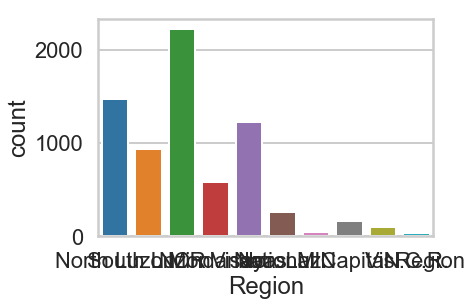

In [34]:
#Countplot for Region
sns.countplot(df_cat['Region'])

In [35]:
#Checking the records in features
df_cat.Region.value_counts()

NCR                        2219
North Luzon                1469
Visayas                    1224
South Luzon                 931
Mindanao                    585
Nor. Luz.                   264
National Capital Region     160
Vis.                        104
MIN                          48
N.C.R.                       29
Name: Region, dtype: int64

It must be taken account that there are redundant values that are incorrectly named such as:
* Nor. Luz.
* MIN
* N.C.R.
* National Capital Region
* Vis.

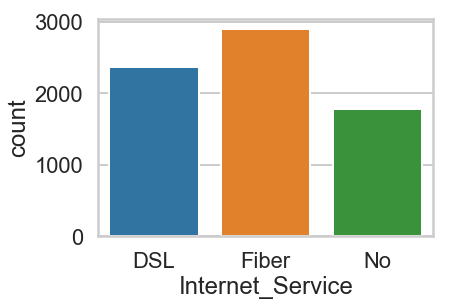

In [36]:
sns.countplot(df_cat['Internet_Service'])

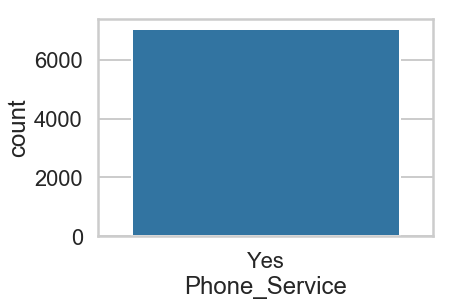

In [37]:
sns.countplot(df_cat['Phone_Service'])
#Knowing everyone has phone service, it can be dropped 

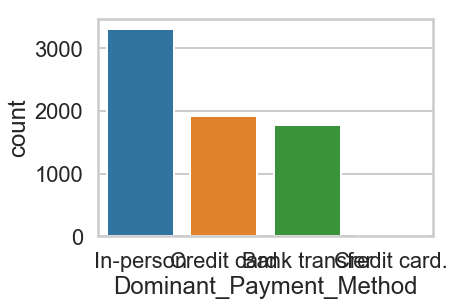

In [38]:
#Countplot for Dominant Payment Method
sns.countplot(df_cat['Dominant_Payment_Method'])

In [39]:
#Checking the vlues under the Dominant Payment Method Features
df_cat.Dominant_Payment_Method.value_counts()

In-person        3306
Credit card      1915
Bank transfer    1784
Credit card.       28
Name: Dominant_Payment_Method, dtype: int64

It must be noted that the Credit card. is redundant here and must be changed

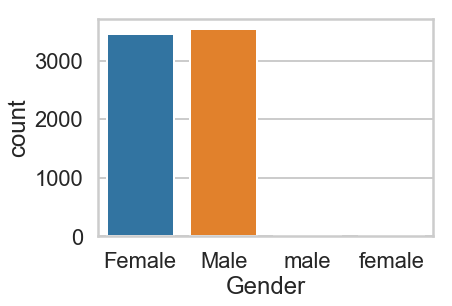

In [40]:
sns.countplot(df_cat['Gender'])

In [41]:
#Checking the vlues under the Gender Features
df_cat.Gender.value_counts()

Male      3534
Female    3449
male        39
female      11
Name: Gender, dtype: int64

Same goes with the Gender where there are male and female inputs that must be renamed to merge with the proper named values.

In [42]:
#Another way to check the values of each columns all at once.
for cat_col in df_cat.columns:
    print (df_cat[cat_col].value_counts())
    print ("\n---------")
    

4718-DHSMV    1
0708-LGSMF    1
3339-EAQNV    1
2202-CUYXZ    1
5038-ETMLM    1
1084-MNSMJ    1
7729-JTEEC    1
0016-QLJIS    1
1265-ZFOSD    1
5686-CMAWK    1
2171-UDMFD    1
5117-ZSMHQ    1
6103-LIANB    1
3317-VLGQT    1
1035-IPQPU    1
7402-EYFXX    1
6878-GGDWG    1
1159-WFSGR    1
0784-GTUUK    1
7481-ATQQS    1
5651-CRHKQ    1
8809-XKHMD    1
1468-DEFNC    1
9938-PRCVK    1
5382-SOYZL    1
0440-UEDAI    1
0818-OCPZO    1
3969-GYXEL    1
3836-FZSDJ    1
1480-IVEVR    1
1262-OPMFY    1
8384-FZBJK    1
9531-NSBMR    1
1043-YCUTE    1
8661-BOYNW    1
1328-EUZHC    1
7954-MLBUN    1
9391-LMANN    1
4191-XOVOM    1
4568-KNYWR    1
3589-PPVKW    1
0320-JDNQG    1
9846-GKXAS    1
3566-CAAYU    1
6769-DYBQN    1
7625-XCQRH    1
4391-RESHN    1
0946-CLJTI    1
8204-TIFGJ    1
5989-OMNJE    1
             ..
1086-LXKFY    1
2636-OHFMN    1
1640-PLFMP    1
0516-QREYC    1
1047-NNCBF    1
0388-EOPEX    1
7483-IQWIB    1
2821-WARNZ    1
8033-ATFAS    1
7517-SAWMO    1
3678-MNGZX    1
2927-QRR

Need to Take Note for Renaming Values:
* For Region - Nor. Luzon (North Luzon); N.C.R., NCR (National Capital Region); Vis (Visayas); MIN (Mindanao) 
* For Gender - male 39 and female 11 
* For Dominant_Pay_Method - Credit card 1915 and Credit card. 28

#### Renaming Values that were spotted together

In [43]:
#Renaming values to retain consistency

df_cat['Region'] = df_cat['Region'].replace({'Nor. Luz.': 'North Luzon',
                                             'NCR': 'National Capital Region',
                                             'N.C.R.': 'National Capital Region',
                                             'Vis.': 'Visayas',
                                             'MIN': 'Mindanao'})

df_cat['Gender'] = df_cat['Gender'].replace({'male': 'Male',
                                             'female': 'Female'})

df_cat['Dominant_Payment_Method'] = df_cat['Dominant_Payment_Method'].replace({'Credit card.': 'Credit Card',
                                                                              'Credit card': 'Credit Card'})

##### Checking the renamed values

In [44]:
df_cat['Region'].value_counts()

National Capital Region    2408
North Luzon                1733
Visayas                    1328
South Luzon                 931
Mindanao                    633
Name: Region, dtype: int64

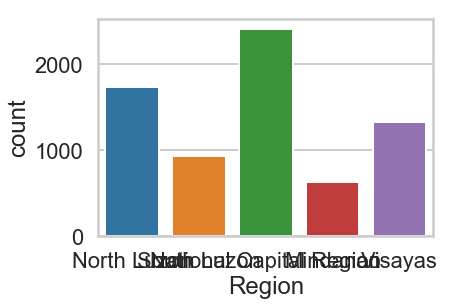

In [45]:
# For categorical variables, you can use a countplot
sns.countplot(df_cat['Region'])

In [46]:
df_cat['Gender'].value_counts()

Male      3573
Female    3460
Name: Gender, dtype: int64

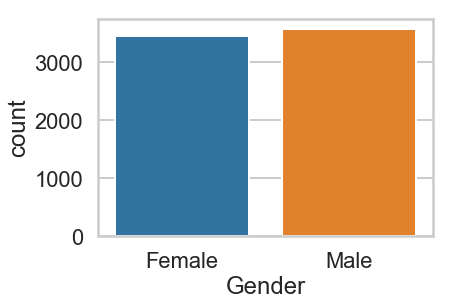

In [47]:
# For categorical variables, you can use a countplot
sns.countplot(df_cat['Gender'])

In [48]:
df_cat['Dominant_Payment_Method'].value_counts()

In-person        3306
Credit Card      1943
Bank transfer    1784
Name: Dominant_Payment_Method, dtype: int64

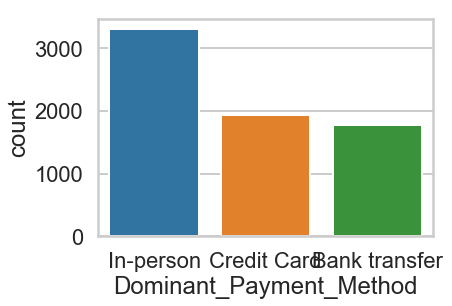

In [49]:
# For categorical variables, you can use a countplot
sns.countplot(df_cat['Dominant_Payment_Method'])

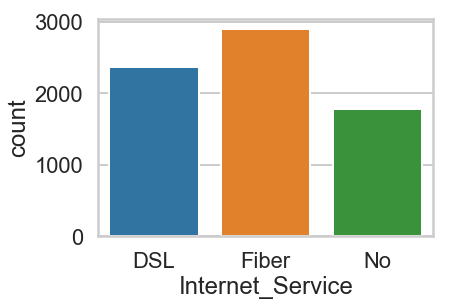

In [50]:
sns.countplot(df_cat['Internet_Service'])

In [51]:
#df_cat.Internet_Service_num.value_counts()
#df_cat.head(10)
#Dropping the categorical features
#df_cat.drop(columns=['Region', 'Gender', 'Phone_Service', 'Internet_Service', 'Dominant_Payment_Method'], axis=1)
#df_cat.set_index('Customer_ID')

#df_cat1 = df_cat.copy()
#df_cat1.head()

In [52]:
#Getting a dummy copy of the dtaset in case of messing up, and dropping the Customer_ID since it's just a unique identifier for the person and not relevant to the data, but storing it for the future use
df_dum1 = df_cat.copy()
df_dum = df_cat.drop('Customer_ID', axis=1)
x_cust = df_cat.Customer_ID

In [53]:
df_dum1.head()

,Customer_ID,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method
0,0002-ORFBO,North Luzon,Female,Yes,DSL,In-person
1,0003-MKNFE,South Luzon,Male,Yes,DSL,In-person
2,0004-TLHLJ,South Luzon,Male,Yes,Fiber,In-person
3,0011-IGKFF,National Capital Region,Male,Yes,Fiber,In-person
4,0013-EXCHZ,Mindanao,Female,Yes,Fiber,In-person


In [54]:
df_dum.head()

,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method
0,North Luzon,Female,Yes,DSL,In-person
1,South Luzon,Male,Yes,DSL,In-person
2,South Luzon,Male,Yes,Fiber,In-person
3,National Capital Region,Male,Yes,Fiber,In-person
4,Mindanao,Female,Yes,Fiber,In-person


#### Numerical Features
For numerical features, we need to convert these features into one-hut encoding (which means columns have to contain values 1 and 0 to be machine readable). 

This part uses one of pandas modules named Get_dummies which reads each festures and breaks it down to certain columns with specific input.

In [55]:
#Initial Checking of the Dataset
df_num.head()

,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn
0,1,1,9,2,0,1,1,0,1310,0
1,0,0,9,1,0,0,0,0,1200,0
2,0,0,4,0,0,0,0,0,1480,1
3,1,0,13,1,0,1,0,0,1960,1
4,1,0,3,2,0,1,0,0,1680,0


In [56]:
#checking the shap and number of numerical columns
df_num.shape

(7033, 10)

In [57]:
#Checking the descriptive statistics
df_num.describe()

,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn
count,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00
mean,0.48,0.30,33.09,1.35,0.41,0.42,0.45,0.14,1293.62,0.13
std,0.50,0.46,63.02,1.36,0.49,0.49,0.50,0.35,603.14,0.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00
25%,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,710.00,0.00
50%,0.00,0.00,29.00,1.00,0.00,0.00,0.00,0.00,1410.00,0.00
75%,1.00,1.00,55.00,2.00,1.00,1.00,1.00,0.00,1800.00,0.00
max,1.00,1.00,4900.00,7.00,1.00,1.00,1.00,1.00,2380.00,1.00


In [58]:
df_converted1 = pd.get_dummies(df_dum)

In [59]:
df_converted1.head()

,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person
0,0,0,1,0,0,1,0,1,1,0,0,0,0,1
1,0,0,0,1,0,0,1,1,1,0,0,0,0,1
2,0,0,0,1,0,0,1,1,0,1,0,0,0,1
3,0,1,0,0,0,0,1,1,0,1,0,0,0,1
4,1,0,0,0,0,1,0,1,0,1,0,0,0,1


In [60]:
#df_cat1 = x_cust.merge(df_converted1, left_on='customerID', right_on='customerID')
#df_converted1.insert(0, 'Customer_ID', x_cust)

#df_converted1.head()
#df_converted1.set_index('Customer_ID')

### Merging Into Final Dataset (Both Categorical and Numerical Features) 

In [61]:
#df_z = pd.concat([merged_dataset, df_converted1], axis =1, join='inner')

In [62]:
#Using the concat function to merge the datasets
df = pd.concat([x_cust, df_converted1, df_num], axis =1, join='inner')

In [63]:
df.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0


In [64]:
df.dtypes

Customer_ID                              object
Region_Mindanao                           uint8
Region_National Capital Region            uint8
Region_North Luzon                        uint8
Region_South Luzon                        uint8
Region_Visayas                            uint8
Gender_Female                             uint8
Gender_Male                               uint8
Phone_Service_Yes                         uint8
Internet_Service_DSL                      uint8
Internet_Service_Fiber                    uint8
Internet_Service_No                       uint8
Dominant_Payment_Method_Bank transfer     uint8
Dominant_Payment_Method_Credit Card       uint8
Dominant_Payment_Method_In-person         uint8
Partner                                   int64
Dependents                                int64
Tenure                                    int64
Customer_Service_Calls                    int64
Online_Security                           int64
Streaming_TV                            

In [65]:
#Dropping the categorical features that are not needed anymore
#df_z.drop(columns=['Region', 'Gender', 'Phone_Service', 'Internet_Service','Dominant_Payment_Method'], inplace = True, axis=0 )

In [66]:
df.head()
df.set_index('Customer_ID')

,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0
0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0
0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1
0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1
0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0
0013-MHZWF,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,9,1,0,1,0,0,1390,0
0013-SMEOE,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,71,1,1,1,1,0,2190,0
0014-BMAQU,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,63,1,1,0,1,0,1690,0
0015-UOCOJ,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,7,1,1,0,0,0,960,0


In [67]:
#Separating Monthly Charges
h = df["Monthly_Charges"]

In [68]:
df.dtypes

Customer_ID                              object
Region_Mindanao                           uint8
Region_National Capital Region            uint8
Region_North Luzon                        uint8
Region_South Luzon                        uint8
Region_Visayas                            uint8
Gender_Female                             uint8
Gender_Male                               uint8
Phone_Service_Yes                         uint8
Internet_Service_DSL                      uint8
Internet_Service_Fiber                    uint8
Internet_Service_No                       uint8
Dominant_Payment_Method_Bank transfer     uint8
Dominant_Payment_Method_Credit Card       uint8
Dominant_Payment_Method_In-person         uint8
Partner                                   int64
Dependents                                int64
Tenure                                    int64
Customer_Service_Calls                    int64
Online_Security                           int64
Streaming_TV                            

In [69]:
df.Customer_Service_Calls.value_counts()

1    3251
2    1617
0    1570
6     124
3     122
5     120
7     118
4     111
Name: Customer_Service_Calls, dtype: int64

In [70]:
df.Churn.value_counts()

0    6115
1     918
Name: Churn, dtype: int64

In [71]:
df.Tenure.value_counts()

1       611
72      362
2       236
3       200
4       174
71      170
5       133
7       131
8       123
70      119
9       119
12      117
10      116
6       110
13      108
68      100
15       99
67       98
11       98
18       97
69       95
24       94
22       90
66       89
35       88
17       87
23       85
16       80
56       80
64       80
52       79
26       79
25       79
60       76
14       76
65       76
61       76
46       74
19       72
63       72
29       72
27       72
30       72
20       71
62       70
41       70
53       70
32       69
51       68
50       68
54       68
47       68
58       67
37       65
42       65
34       65
57       65
43       65
49       65
31       65
33       64
48       64
40       64
55       64
21       63
45       61
59       60
38       59
28       57
39       56
44       51
36       50
0        11
4900      1
Name: Tenure, dtype: int64

In [72]:
df.Monthly_Charges.value_counts()

 400     424
 390     321
 410     272
 500     131
 510      95
 1400     93
 1490     91
 1610     91
 490      91
 1500     86
 1700     82
 1600     81
 1800     79
 420      79
 1410     77
 380      77
 1580     76
 1510     76
 1710     75
 1890     74
 1690     74
 1900     74
 1590     73
 1390     70
 1810     70
 1790     70
 1000     65
 1620     62
 900      62
 1090     61
 2010     61
 2000     60
 1100     60
 1910     59
 1990     58
 1780     58
 1200     57
 1880     57
 1010     56
 1720     54
 1110     53
 1380     53
 2080     53
 910      52
 2090     52
 2100     51
 1480     51
 890      50
 2110     50
 1520     49
        ... 
 1360     11
 870      11
 2310     11
 930      11
 1340     10
 1270     10
 2330     10
 620      10
 670      10
 2280     10
 1550     10
 2240     10
 680       9
-1         9
 470       9
 960       9
 1250      8
 1160      8
 1450      8
 580       8
 1040      7
 820       7
 1260      7
 1150      6
 770       6
 1060      6

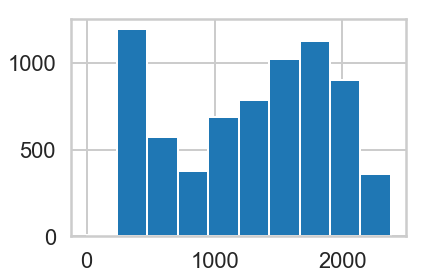

In [73]:
df.Monthly_Charges.hist()

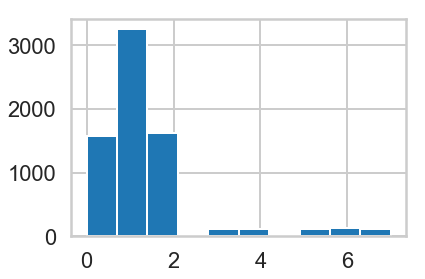

In [74]:
df.Customer_Service_Calls.hist()

### Removing Outliers
Outliers are data points that are out of the usual trend of the data. It may be helpful but one problem is that models have tendency to be sensitive to outliers and greatly affect the result and analysis, so it's advised to be removed.

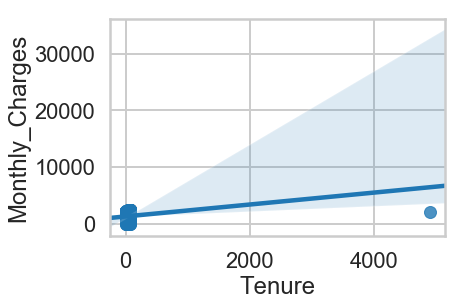

In [75]:
#Visualization of finding the outliers
sns.regplot(data = df, x = 'Tenure', y = 'Monthly_Charges')

In [76]:
#Dropping the outlier
df = df.drop(df[(df.Tenure > 4000) & (df.Monthly_Charges < 5000)].index)

In [77]:
#Checking if the outlier has been already dropped
df.Tenure.value_counts()

1     611
72    362
2     236
3     200
4     174
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    108
68    100
15     99
11     98
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
52     79
25     79
26     79
14     76
65     76
61     76
60     76
46     74
63     72
29     72
27     72
30     72
19     72
20     71
62     70
41     70
53     70
32     69
47     68
54     68
50     68
51     68
58     67
43     65
42     65
31     65
34     65
37     65
57     65
49     65
55     64
40     64
48     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: Tenure, dtype: int64

In [78]:
df.Customer_Service_Calls.value_counts()

1    3251
2    1617
0    1570
6     123
3     122
5     120
7     118
4     111
Name: Customer_Service_Calls, dtype: int64

In [79]:
df.Monthly_Charges.value_counts()

 400     424
 390     321
 410     272
 500     131
 510      95
 1400     93
 1490     91
 1610     91
 490      91
 1500     86
 1700     82
 1600     81
 1800     79
 420      79
 1410     77
 380      77
 1580     76
 1510     76
 1710     75
 1890     74
 1690     74
 1900     74
 1590     73
 1390     70
 1810     70
 1790     70
 1000     65
 1620     62
 900      62
 1090     61
 2010     61
 2000     60
 1100     60
 1910     59
 1990     58
 1780     58
 1200     57
 1880     57
 1010     56
 1720     54
 1110     53
 1380     53
 2080     53
 910      52
 2090     52
 2100     51
 1480     51
 890      50
 2110     50
 1520     49
        ... 
 1360     11
 870      11
 2310     11
 930      11
 1340     10
 1270     10
 2330     10
 620      10
 670      10
 2280     10
 1550     10
 2240     10
 680       9
-1         9
 470       9
 960       9
 1250      8
 1160      8
 1450      8
 580       8
 1040      7
 820       7
 1260      7
 1150      6
 770       6
 1060      6

In [80]:
df.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0


In [81]:
#Checking if it affects the shape
df.shape

(7032, 25)

## Checking the Correlation between Features through Correlation Map

One of the Exploratory Data Analysis process was to check the correlation of features to our target feature. Correlation refers to the relation between 2 variables (features). This is very helpful in knowing what factors are most relevant or need in a dataset and gives a glimpse on how connected the features in the dataset were.

We check the correlation of the features by calculating the correlation coefficient, which tells the degree of relationship. It ranges from +1.0 to -1.0. The more higher the coefficient, the more positive the correlation between two variables.. 

In our use case, we have a target feature to be compared to other features in terms of correlation, which is our "Churn" column.

In [82]:
#dropping this columns since it is not relevant if we were to check the correlation with it.
df.drop(columns=['Customer_ID','Phone_Service_Yes'], axis=1)

,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn
0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0
1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0
2,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1
3,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1
4,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0
5,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,9,1,0,1,0,0,1390,0
6,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,71,1,1,1,1,0,2190,0
7,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,63,1,1,0,1,0,1690,0
8,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,7,1,1,0,0,0,960,0
9,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,65,0,1,1,1,0,1810,0


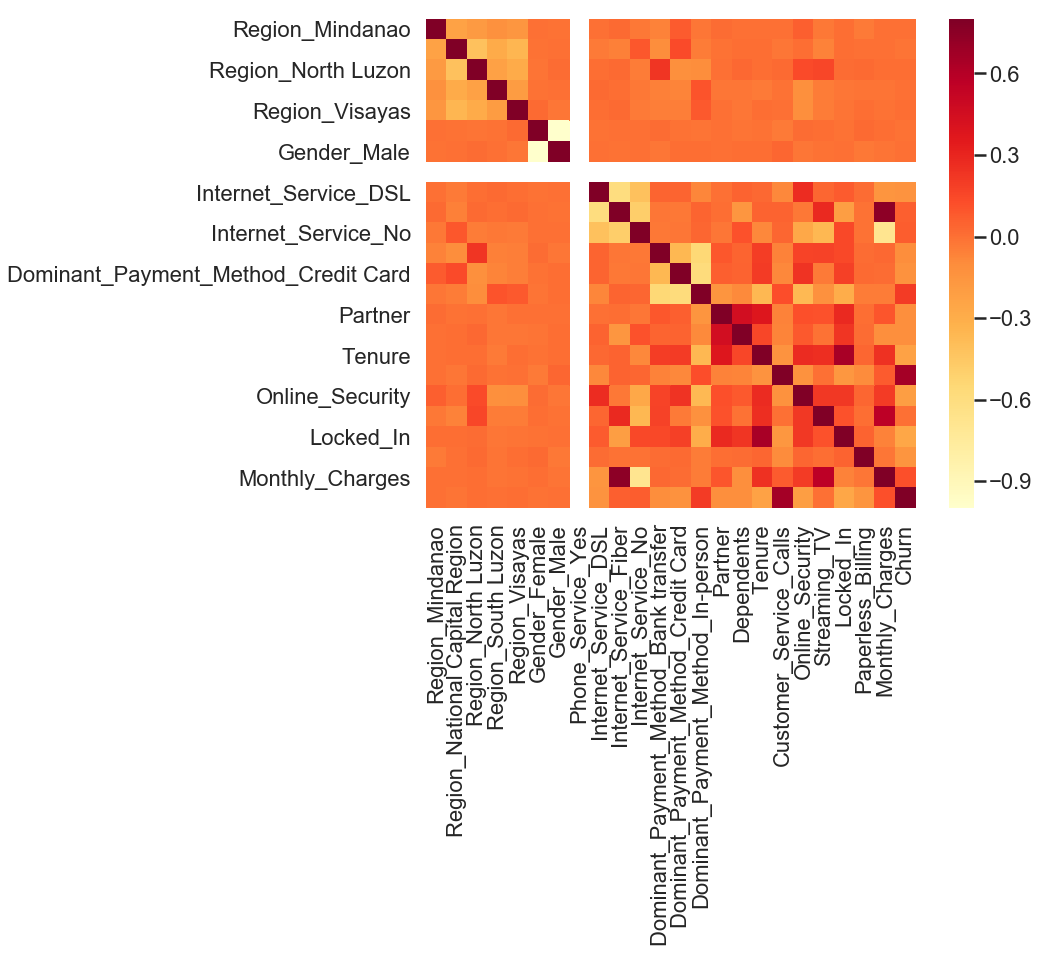

In [83]:
#Creating a correlation heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlOrRd");

For this heatmap, the darker the color red is, the more likely it is correlated.

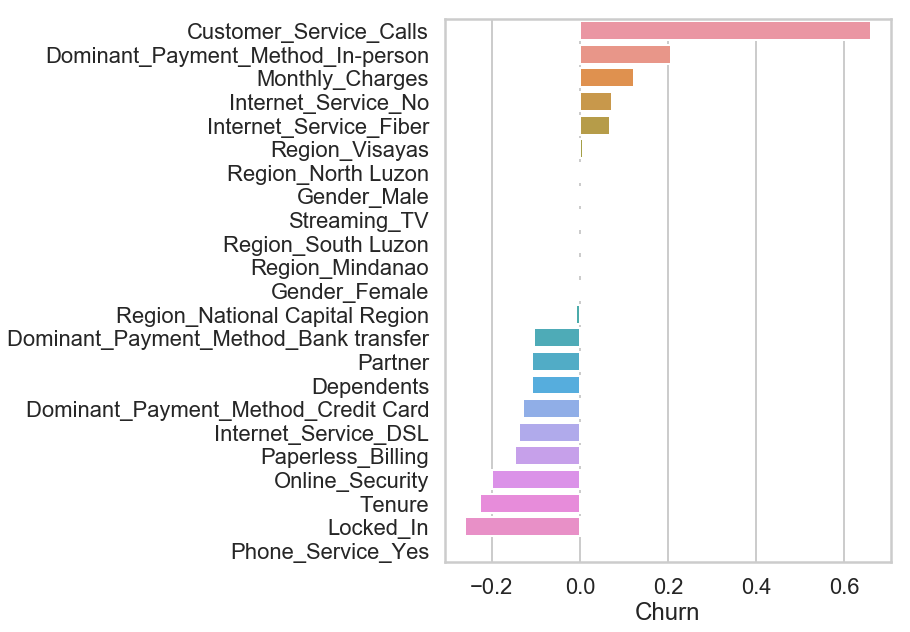

In [84]:
#Checking the correlation using the barplot and being sorted in descending order
corr = corrmat.sort_values('Churn', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.Churn[1:], corr.index[1:], orient='h')
plt.show()

As you can notice, Customer Service Calls is seen to be highly correlated with the Churn variable, followed by paying In-person, which is by a huge margin/gap.

In [85]:
#This shows the highly correlated features which is above moderate coefficient (0.5)
#Correlation with output variable
cor_target = abs(corrmat["Churn"])

#Selecting highly correlated features (Anything with a correlation >0.5)
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

Churn                    1.00
Customer_Service_Calls   0.66
Name: Churn, dtype: float64

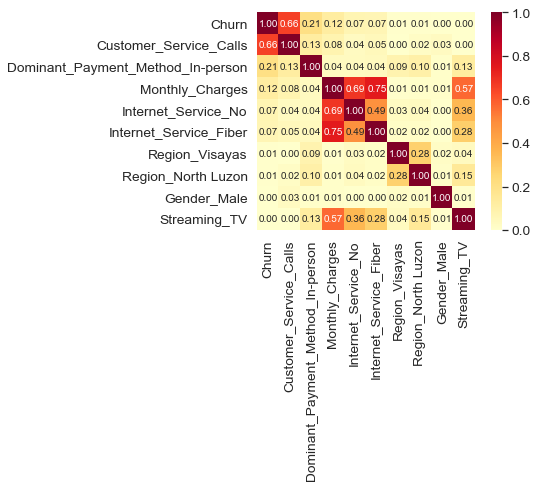

In [86]:
#Churn correlation matrix to better understand the correlation heatmap

#number of variables for heatmap
k = 10 

cols = corrmat.nlargest(k, 'Churn')['Churn'].index

cm = abs(np.corrcoef(df[cols].values.T))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = 'YlOrRd', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#annot = True in sns
plt.show()

Assumptions and Hypothesis gathered

- *'Customer_Service_Calls'* is strongly correlated with *'Churn'*. (Most who Churn are those who encounter issues with Customer Service Calls)
- Highly correlated pairs: *'Monthly_Charges'* with *'Internet_Service'* (both 'Internet_Service_No' and 'Internet_Service_Fiber') and *'Streaming_TV'* 
- 'Interesting Insights: *'Region_Visayas'* and *'Region_North_Luzon'* are regions showing correlation than Mindanao, South Luzon, and NCR in Churn (must be with the competitive market)
- *'Gender_Male'* showing correlation in Customer Service Calls (maybe most males are the ones availing Customer Service)

## Feature Engineering
Feature Engineering means creating new features that are derived from the previous dataset created. Such samples are those who are High Paying or not. 

In [87]:
df.dtypes

Customer_ID                              object
Region_Mindanao                           uint8
Region_National Capital Region            uint8
Region_North Luzon                        uint8
Region_South Luzon                        uint8
Region_Visayas                            uint8
Gender_Female                             uint8
Gender_Male                               uint8
Phone_Service_Yes                         uint8
Internet_Service_DSL                      uint8
Internet_Service_Fiber                    uint8
Internet_Service_No                       uint8
Dominant_Payment_Method_Bank transfer     uint8
Dominant_Payment_Method_Credit Card       uint8
Dominant_Payment_Method_In-person         uint8
Partner                                   int64
Dependents                                int64
Tenure                                    int64
Customer_Service_Calls                    int64
Online_Security                           int64
Streaming_TV                            

#### Features to be added:
* Tenure - 
           Long-term: Those who have been availing the service for longer Period of time 5 - 6 years (49 - 72 months)
           Steady: Those that are currently in the middle of 3 - 4 years (25 - 48 months)
           Short-term: Those who are new in availing the services 0- 2 years (0- 24 months)
* Customer_Service_Calls 
           Not_User: Those who never us the Customer Services (0 calls)
           Minimal Users: Those who use Customer Services the least (1 - 3 calls)
           Frequent Users: Those who use the phone calls very frequent (4 - 7 calls)
* Monthly_Charges 
           High-Charged: Those who pay 1700 - 2500
           Middle-Charged: Those who pay 900 - 1600
           Low-Charged: Those who pay pay 400 - 800
* Avail_Service 
           Phone_and_Internet_Service : Those who are subscribed to Phone and Internet service 
                  

In [88]:
#Setting index as identifer in the dataset
df.head()
df.set_index('Customer_ID')

,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0
0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0
0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1
0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1
0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0
0013-MHZWF,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,9,1,0,1,0,0,1390,0
0013-SMEOE,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,71,1,1,1,1,0,2190,0
0014-BMAQU,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,63,1,1,0,1,0,1690,0
0015-UOCOJ,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,7,1,1,0,0,0,960,0


#### Tenure Engineering
* Long-term: Those who have been availing the service for longer Period of time 5 - 6 years (49 - 72 months)
* Steady: Those that are currently in the middle of 3 - 4 years (25 - 48 months)
* Short-term: Those who are new in availing the services 0- 2 years (0- 24 months)

In [89]:
#Creating new features in relation to Tenure feature.
df_tenure = df.copy()
a = df_tenure['Tenure']
df_tenure['Long_term'] = np.where(a >= 49, 1, 0)
df_tenure.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0


In [90]:
#Checking the counts of each value
df_tenure['Long_term'].value_counts()

0    4795
1    2237
Name: Long_term, dtype: int64

In [91]:
df_tenure['Steady'] = np.where((a >= 25) & (a <= 48), 1, 0)

In [92]:
df_tenure.Steady.value_counts()

0    5438
1    1594
Name: Steady, dtype: int64

In [93]:
df_tenure['Short_term'] = np.where((a >= 0) & (a <= 24), 1, 0)

In [94]:
df_tenure.Short_term.value_counts()

0    3831
1    3201
Name: Short_term, dtype: int64

In [95]:
df_tenure.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term,Steady,Short_term
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0,0,1
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0,0,1
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,0,1


#### Customer_Service_Calls Engineering
* Not_User: Those who never use the Customer Services (0 calls)
* Min_User: Those who use Customer Services the least (1 - 3 calls)
* Freq_User: Those who use the phone calls very frequent (4 - 7 calls)

In [96]:
df_customer = df_tenure.copy()
b = df_customer['Customer_Service_Calls']
df_customer['Not_User'] = np.where((b == 0), 1, 0)
df_customer.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term,Steady,Short_term,Not_User
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1,0
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1,0
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0,0,1,1
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0,0,1,0
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,0,1,0


In [97]:
df_customer.Not_User.value_counts()

0    5462
1    1570
Name: Not_User, dtype: int64

In [98]:
df_customer['Min_User'] = np.where((b >= 1) & (b <= 3), 1, 0)
df_customer.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term,Steady,Short_term,Not_User,Min_User
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1,0,1
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1,0,1
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0,0,1,1,0
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0,0,1,0,1
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,0,1,0,1


In [99]:
df_customer.Min_User.value_counts()

1    4990
0    2042
Name: Min_User, dtype: int64

In [100]:
df_customer['Freq_User'] = np.where((b >= 4) & (b <= 7), 1, 0)
df_customer.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term,Steady,Short_term,Not_User,Min_User,Freq_User
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1,0,1,0
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1,0,1,0
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0,0,1,1,0,0
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0,0,1,0,1,0
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,0,1,0,1,0


In [101]:
df_customer.Freq_User.value_counts()

0    6560
1     472
Name: Freq_User, dtype: int64

#### Monthly_Charges Engineering
* High-Charged: Those who pay 1700 - 2500 pesos
* Middle-Charged: Those who pay 900 and below 1600 pesos
* Low-Charged: Those who pay pay 400 - 800 pesos

In [102]:
df_monthch = df_customer.copy()
c = df_monthch['Monthly_Charges']
df_monthch['High_Charged'] = np.where((c >= 1600) & (c <= 2500), 1, 0)
df_monthch.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term,Steady,Short_term,Not_User,Min_User,Freq_User,High_Charged
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1,0,1,0,0
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1,0,1,0,0
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0,0,1,1,0,0,0
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0,0,1,0,1,0,1
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,0,1,0,1,0,1


In [103]:
df_monthch.High_Charged.value_counts()

0    4325
1    2707
Name: High_Charged, dtype: int64

In [104]:
df_monthch['Middle_Charged'] = np.where((c >= 800) & (c < 1600), 1, 0)
df_monthch.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term,Steady,Short_term,Not_User,Min_User,Freq_User,High_Charged,Middle_Charged
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1,0,1,0,0,1
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1,0,1,0,0,1
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0,0,1,1,0,0,0,1
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0,0,1,0,1,0,1,0
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,0,1,0,1,0,1,0


In [105]:
df_monthch.Middle_Charged.value_counts()

0    4546
1    2486
Name: Middle_Charged, dtype: int64

In [106]:
df_monthch['Low_Charged'] = np.where((c >= 0) & (c < 800), 1, 0)
df_monthch.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term,Steady,Short_term,Not_User,Min_User,Freq_User,High_Charged,Middle_Charged,Low_Charged
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1,0,1,0,0,1,0
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1,0,1,0,0,1,0
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0,0,1,1,0,0,0,1,0
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0,0,1,0,1,0,1,0,0
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,0,1,0,1,0,1,0,0


In [107]:
df_monthch.Low_Charged.value_counts()

0    5202
1    1830
Name: Low_Charged, dtype: int64

In [108]:
df_monthch.dtypes

Customer_ID                              object
Region_Mindanao                           uint8
Region_National Capital Region            uint8
Region_North Luzon                        uint8
Region_South Luzon                        uint8
Region_Visayas                            uint8
Gender_Female                             uint8
Gender_Male                               uint8
Phone_Service_Yes                         uint8
Internet_Service_DSL                      uint8
Internet_Service_Fiber                    uint8
Internet_Service_No                       uint8
Dominant_Payment_Method_Bank transfer     uint8
Dominant_Payment_Method_Credit Card       uint8
Dominant_Payment_Method_In-person         uint8
Partner                                   int64
Dependents                                int64
Tenure                                    int64
Customer_Service_Calls                    int64
Online_Security                           int64
Streaming_TV                            

In [109]:
df_monthch.Phone_Service_Yes.value_counts()

1    7032
Name: Phone_Service_Yes, dtype: int64

#### Package Services Engineering
* Phone_and_Internet_Service : Those who are subscribed to Phone and Internet service 

(Phone_Service is already considered as a part of the services so we'll focus on the Internet service package for assessment)

In [110]:
df_service = df_monthch.copy()
d = df_service['Internet_Service_DSL']
e = df_service['Internet_Service_Fiber']
f = df_service['Phone_Service_Yes']
df_service['Phone_And_Internet'] = np.where( (f == 1) & (d == 1) | (e == 1), 1, 0)
df_service.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term,Steady,Short_term,Not_User,Min_User,Freq_User,High_Charged,Middle_Charged,Low_Charged,Phone_And_Internet
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1,0,1,0,0,1,0,1
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1,0,1,0,0,1,0,1
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0,0,1,1,0,0,0,1,0,1
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0,0,1,0,1,0,1,0,0,1
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,0,1,0,1,0,1,0,0,1


In [111]:
df_service.Phone_And_Internet.value_counts()

1    5253
0    1779
Name: Phone_And_Internet, dtype: int64

In [112]:
df_service.to_csv("dataset_fE.csv")

## Feature Selection
Feature selection is the process where we choose the features from the pre-existing and ones engineered that are can give more relevance to our dataset when we run our model. This is also done in order to reduce the features to be included in our dataset. The fewer the features, the better the models run.

In [113]:
df_s = df_service.copy()

In [114]:
df_s.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Phone_Service_Yes,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Churn,Long_term,Steady,Short_term,Not_User,Min_User,Freq_User,High_Charged,Middle_Charged,Low_Charged,Phone_And_Internet
0,0002-ORFBO,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1,0,1,0,0,1,0,1
1,0003-MKNFE,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1,0,1,0,0,1,0,1
2,0004-TLHLJ,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,1,0,0,1,1,0,0,0,1,0,1
3,0011-IGKFF,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,1,0,0,1,0,1,0,1,0,0,1
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,0,1,0,1,0,1,0,0,1


In [115]:
df_s.shape

(7032, 35)

#### Separating Features from Target (Churn)

In [116]:
#Separating the Churn variable, since it's our targets and Customer ID
features = df_s.drop(columns=['Churn','Customer_ID'], axis=1)
target = df_s.Churn
cust = df_s.Customer_ID
h = df_s.Monthly_Charges

#### Low Variance Filter
Variance is a statistical measure of the amount of variation in the given variable or feature. In simple explanation, variance tells of how it can bring change significantly to your data. The higher the variance, the more significant it is to your data. In the Low Variance Filter, it "filters" your features, calculates their variance and tells you the features that actually doesn't give much importance to your data that you can just drop.

In [117]:
# Compute the variance and sort
features.var().sort_values()[:60]

Phone_Service_Yes                            0.00
Freq_User                                    0.06
Region_Mindanao                              0.08
Region_South Luzon                           0.11
Paperless_Billing                            0.12
Region_Visayas                               0.15
Not_User                                     0.17
Steady                                       0.18
Region_North Luzon                           0.19
Internet_Service_No                          0.19
Phone_And_Internet                           0.19
Dominant_Payment_Method_Bank transfer        0.19
Low_Charged                                  0.19
Dominant_Payment_Method_Credit Card          0.20
Min_User                                     0.21
Dependents                                   0.21
Long_term                                    0.22
Internet_Service_DSL                         0.22
Region_National Capital Region               0.23
Middle_Charged                               0.23


In [118]:
#Import the VarianceThreshold Function
from sklearn.feature_selection import VarianceThreshold

#Instantiate the Function and Set the Threshold
selector = VarianceThreshold(0.05)

Variance Threshold is a feature in the sklearn package where it decides those features that doesn't meet the threshold of 0.05. The idea was to keep those zero variance features and drop it.

In [119]:
#Apply the Function to filter out the Low Variance Columns/Features
filtered_features = pd.DataFrame(selector.fit_transform(features), index=features.index)

In [120]:
#Note, the DataFrame Created has no Column Names
filtered_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,1,0,1,0,0,1,0,1
1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,1,0,1,0,0,1,0,1
2,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,0,0,1,1,0,0,0,1,0,1
3,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,0,0,1,0,1,0,1,0,0,1
4,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,1,0,1,0,1,0,0,1


In [121]:
#Use this attribute to get Column Names
selected = selector.get_support()

#Rename the columns
filtered_features.columns = features.columns[selected]

In [122]:
filtered_features.head()

,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Gender_Male,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Long_term,Steady,Short_term,Not_User,Min_User,Freq_User,High_Charged,Middle_Charged,Low_Charged,Phone_And_Internet
0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,1,0,1,0,0,1,0,1
1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,1,0,1,0,0,1,0,1
2,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,0,0,1,1,0,0,0,1,0,1
3,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,0,0,1,0,1,0,1,0,0,1
4,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,1,0,1,0,1,0,0,1


In [123]:
filtered_features.var().sort_values().head()

Freq_User            0.06
Region_Mindanao      0.08
Region_South Luzon   0.11
Paperless_Billing    0.12
Region_Visayas       0.15
dtype: float64

In [124]:
#Compare previous vs current number of Features
print("No. of Features (Original): %i" %len(features.columns))
print("No. of Features (Variance Filter): %i" %len(filtered_features.columns))

No. of Features (Original): 33
No. of Features (Variance Filter): 32


#### High Correlation Filter
High Correlation filter works by removing those highly correlated features that may carry the similar trendsto reduce our model.

In [125]:
corr_matrix = filtered_features.corr().abs()

In [126]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [127]:
threshold = 0.80

In [128]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [129]:
to_drop

['Gender_Male',
 'Long_term',
 'Short_term',
 'Min_User',
 'Freq_User',
 'Low_Charged',
 'Phone_And_Internet']

In [130]:
filtered_features_2 = filtered_features.drop(to_drop, axis=1)

In [131]:
#Compare previous vs current number of Features
print("No. of Features (Original): %i" %len(features.columns))
print("No. of Features (Variance Filter): %i" %len(filtered_features.columns))
print("No. of Features (Correlation Filter): %i" %len(filtered_features_2.columns))

No. of Features (Original): 33
No. of Features (Variance Filter): 32
No. of Features (Correlation Filter): 25


In [132]:
filtered_features_2.head()

,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Steady,Not_User,High_Charged,Middle_Charged
0,0,0,1,0,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,0,1,0,1
3,0,1,0,0,0,0,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,1,0


#### Custom Function
Theoffers the same step with the other two but for this one, it is created in having its own function of passing our threshold and our data in automaticlly dropping the the filtered features.

In [133]:
def correlation_filter(df_s,threshold):
    # Create correlation matrix
    corr_matrix = df_s.corr().abs()
    
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return to_drop

In [134]:
function_test = correlation_filter(filtered_features,threshold)

In [135]:
len(function_test)

7

In [136]:
function_test

['Gender_Male',
 'Long_term',
 'Short_term',
 'Min_User',
 'Freq_User',
 'Low_Charged',
 'Phone_And_Internet']

#### Verification

In [137]:
# Print out top correlated features

#Reshape the Matrix
correlated = corr_matrix.unstack()

#Reset Index from Multi-index to single index
correlated = correlated.reset_index(level=0).reset_index()

#Rename Columns
correlated.columns = ["Feature1", "Feature2", "Correlation"]

#Sort by Correlation Value
corr_sorted = correlated.sort_values("Correlation", ascending=False)

In [138]:
correlated.head()

,Feature1,Feature2,Correlation
0,Region_Mindanao,Region_Mindanao,1.00
1,Region_National Capital Region,Region_Mindanao,0.23
2,Region_North Luzon,Region_Mindanao,0.18
3,Region_South Luzon,Region_Mindanao,0.12
4,Region_Visayas,Region_Mindanao,0.15


In [139]:
corr_sorted_pairs = corr_sorted[corr_sorted['Feature1'].values != corr_sorted['Feature2'].values]

In [140]:
corr_sorted_pairs.reset_index(drop=True,inplace=True)

In [141]:
corr_sorted_final = corr_sorted_pairs.iloc[::2]

In [142]:
corr_sorted_final.Feature1.nunique()

32

In [143]:
corr_sorted_final_ver = corr_sorted_final[corr_sorted_final.Correlation > threshold]

In [144]:
corr_sorted_final_ver

,Feature1,Feature2,Correlation
0,Phone_And_Internet,Internet_Service_No,1.00
2,Gender_Male,Gender_Female,1.00
4,Tenure,Short_term,0.87
6,Tenure,Long_term,0.85
8,Not_User,Min_User,0.84
10,Monthly_Charges,Low_Charged,0.82
12,Customer_Service_Calls,Freq_User,0.82
14,Phone_And_Internet,Low_Charged,0.80
16,Internet_Service_No,Low_Charged,0.80


#### Low Correlation to Target Filter

In [145]:
df_temp = pd.concat([cust,filtered_features_2, target], axis =1, join='inner')

In [146]:
df_temp.shape

(7032, 27)

In [147]:
df_temp.head()

,Customer_ID,Region_Mindanao,Region_National Capital Region,Region_North Luzon,Region_South Luzon,Region_Visayas,Gender_Female,Internet_Service_DSL,Internet_Service_Fiber,Internet_Service_No,Dominant_Payment_Method_Bank transfer,Dominant_Payment_Method_Credit Card,Dominant_Payment_Method_In-person,Partner,Dependents,Tenure,Customer_Service_Calls,Online_Security,Streaming_TV,Locked_In,Paperless_Billing,Monthly_Charges,Steady,Not_User,High_Charged,Middle_Charged,Churn
0,0002-ORFBO,0,0,1,0,0,1,1,0,0,0,0,1,1,1,9,2,0,1,1,0,1310,0,0,0,1,0
1,0003-MKNFE,0,0,0,1,0,0,1,0,0,0,0,1,0,0,9,1,0,0,0,0,1200,0,0,0,1,0
2,0004-TLHLJ,0,0,0,1,0,0,0,1,0,0,0,1,0,0,4,0,0,0,0,0,1480,0,1,0,1,1
3,0011-IGKFF,0,1,0,0,0,0,0,1,0,0,0,1,1,0,13,1,0,1,0,0,1960,0,0,1,0,1
4,0013-EXCHZ,1,0,0,0,0,1,0,1,0,0,0,1,1,0,3,2,0,1,0,0,1680,0,0,1,0,0


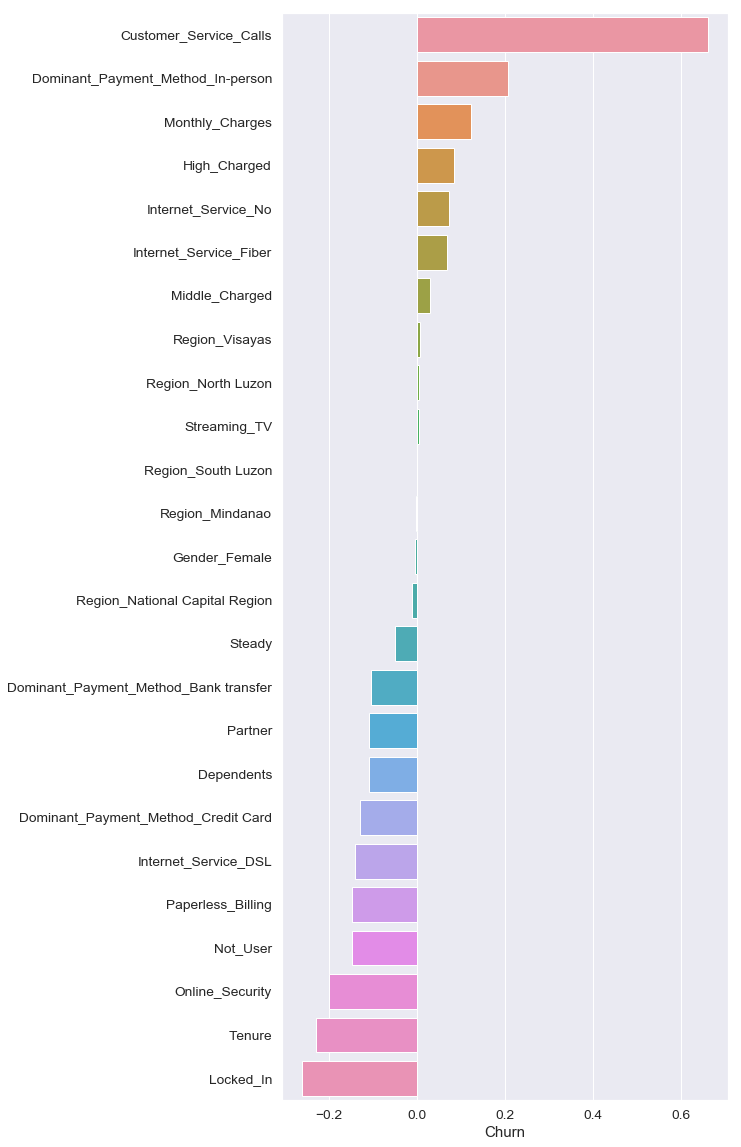

In [148]:
#Get the Correlation
corrmat = df_temp.corr()
corr = corrmat.sort_values('Churn', ascending=False)

plt.figure(figsize=(8,20))
sns.barplot( corr.Churn[1:], corr.index[1:], orient='h')
plt.show()

In [149]:
#Get absolute values and sort by lowest to highest
corr_table =  abs(corr.Churn[1:]).sort_values(ascending = True)
#corr_table[0:20]

In [150]:
#Option1: Based on Threshold, or the rule of thumb
cor_threshold = 0.20 
cols_to_drop = corr_table[corr_table < cor_threshold].index

In [151]:
len(cols_to_drop)

21

In [152]:
#Option2: lowest N features
cor_lowest_n = 20
cols_to_drop = corr_table[0:cor_lowest_n].index.values

In [153]:
len(cols_to_drop)

20

In [154]:
cols_to_drop

array(['Region_South Luzon', 'Region_Mindanao', 'Streaming_TV',
       'Gender_Female', 'Region_North Luzon', 'Region_Visayas',
       'Region_National Capital Region', 'Middle_Charged', 'Steady',
       'Internet_Service_Fiber', 'Internet_Service_No', 'High_Charged',
       'Dominant_Payment_Method_Bank transfer', 'Partner', 'Dependents',
       'Monthly_Charges', 'Dominant_Payment_Method_Credit Card',
       'Internet_Service_DSL', 'Paperless_Billing', 'Not_User'],
      dtype=object)

In [155]:
df_final = df_temp.drop(cols_to_drop, axis=1)

In [156]:
#Compare previous vs current number of Features
print("No. of Features (Original): %i" %len(features.columns))
print("No. of Features (Variance Filter): %i" %len(filtered_features.columns))
print("No. of Features (Correlation Filter): %i" %len(filtered_features_2.columns))
print("No. of Features (Correlation Filter): %i" %(len(df_final.columns)-1))

No. of Features (Original): 33
No. of Features (Variance Filter): 32
No. of Features (Correlation Filter): 25
No. of Features (Correlation Filter): 6


In [157]:
df_final.shape

(7032, 7)

In [158]:
df_final.head()

,Customer_ID,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Churn
0,0002-ORFBO,1,9,2,0,1,0
1,0003-MKNFE,1,9,1,0,0,0
2,0004-TLHLJ,1,4,0,0,0,1
3,0011-IGKFF,1,13,1,0,0,1
4,0013-EXCHZ,1,3,2,0,0,0


In [159]:
df_final.to_csv("df_final.csv")

In [160]:
#abdf = pd.concat([df_dum1, df_final], axis =1, join='inner')

In [161]:
abdf = pd.merge(df_dum1, df_final, how='inner', on="Customer_ID")

In [162]:
abdf.head()

,Customer_ID,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Churn
0,0002-ORFBO,North Luzon,Female,Yes,DSL,In-person,1,9,2,0,1,0
1,0003-MKNFE,South Luzon,Male,Yes,DSL,In-person,1,9,1,0,0,0
2,0004-TLHLJ,South Luzon,Male,Yes,Fiber,In-person,1,4,0,0,0,1
3,0011-IGKFF,National Capital Region,Male,Yes,Fiber,In-person,1,13,1,0,0,1
4,0013-EXCHZ,Mindanao,Female,Yes,Fiber,In-person,1,3,2,0,0,0


In [163]:
abdf = pd.concat([abdf, h], axis=1, join="inner")

## Data Modelling - Logistic Regression
One of the effective models to be used in costumer churn analysis is Logistic Regression. Logistic regression predicts the values between 0 and 1, based on the sigmoid function. In our usecase, it predicts whether a customer has churn or not. It is training the model in looking for patterns that could help identify in solving our usecase, and how effective it is.

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.preprocessing import MinMaxScaler

For this one, we imported some sklearn features that would perform the function. 

* LogisticRegression - is one of the models you can play with inside sklearns function.
* train_test_split - this module separates our dataset into 2 parts: our training dataset and testing dataset.
* confusion matrix, classification_report, accuracy score - metrics to determine if our model is working well.
* MinMaxScaler - preprocessing feature where it scales our data before being trained to the model.

In [165]:
abdf.head()

,Customer_ID,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Churn,Monthly_Charges
0,0002-ORFBO,North Luzon,Female,Yes,DSL,In-person,1,9,2,0,1,0,1310
1,0003-MKNFE,South Luzon,Male,Yes,DSL,In-person,1,9,1,0,0,0,1200
2,0004-TLHLJ,South Luzon,Male,Yes,Fiber,In-person,1,4,0,0,0,1,1480
3,0011-IGKFF,National Capital Region,Male,Yes,Fiber,In-person,1,13,1,0,0,1,1960
4,0013-EXCHZ,Mindanao,Female,Yes,Fiber,In-person,1,3,2,0,0,0,1680


In [166]:
df_final.head()

,Customer_ID,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Churn
0,0002-ORFBO,1,9,2,0,1,0
1,0003-MKNFE,1,9,1,0,0,0
2,0004-TLHLJ,1,4,0,0,0,1
3,0011-IGKFF,1,13,1,0,0,1
4,0013-EXCHZ,1,3,2,0,0,0


In [167]:
abdf.describe()

,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Churn,Monthly_Charges
count,7031.00,7031.00,7031.00,7031.00,7031.00,7031.00,7031.00
mean,0.47,32.39,1.35,0.41,0.45,0.13,1293.53
std,0.50,24.56,1.36,0.49,0.50,0.34,603.15
min,0.00,0.00,0.00,0.00,0.00,0.00,-1.00
25%,0.00,9.00,1.00,0.00,0.00,0.00,710.00
50%,0.00,29.00,1.00,0.00,0.00,0.00,1410.00
75%,1.00,55.00,2.00,1.00,1.00,0.00,1800.00
max,1.00,72.00,7.00,1.00,1.00,1.00,2380.00


In [168]:
df_final.describe()

,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Churn
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.47,32.40,1.35,0.41,0.45,0.13
std,0.50,24.56,1.36,0.49,0.50,0.34
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,9.00,1.00,0.00,0.00,0.00
50%,0.00,29.00,1.00,0.00,0.00,0.00
75%,1.00,55.00,2.00,1.00,1.00,0.00
max,1.00,72.00,7.00,1.00,1.00,1.00


In [169]:
abdf.shape

(7031, 13)

In [170]:
abdf.dtypes

Customer_ID                          object
Region                               object
Gender                               object
Phone_Service                        object
Internet_Service                     object
Dominant_Payment_Method              object
Dominant_Payment_Method_In-person     int64
Tenure                                int64
Customer_Service_Calls                int64
Online_Security                       int64
Locked_In                             int64
Churn                                 int64
Monthly_Charges                       int64
dtype: object

In [171]:
df_final.shape

(7032, 7)

In [172]:
abdf['Churn'].value_counts()

0    6114
1     917
Name: Churn, dtype: int64

In [173]:
#Identify and check the value counts of the target variable
df_final['Churn'].value_counts()

0    6115
1     917
Name: Churn, dtype: int64

In [174]:
abdf.dtypes

Customer_ID                          object
Region                               object
Gender                               object
Phone_Service                        object
Internet_Service                     object
Dominant_Payment_Method              object
Dominant_Payment_Method_In-person     int64
Tenure                                int64
Customer_Service_Calls                int64
Online_Security                       int64
Locked_In                             int64
Churn                                 int64
Monthly_Charges                       int64
dtype: object

In [175]:
abdf['Churn'].value_counts()

0    6114
1     917
Name: Churn, dtype: int64

### Building the Model

In [176]:
#Separate the Features and the Target Variable
X = abdf.drop(["Customer_ID", "Region", "Gender", "Phone_Service", "Internet_Service", "Dominant_Payment_Method","Churn", "Monthly_Charges"], axis=1)
y_1 = abdf["Churn"]

In [177]:
#Separate the Features and the Target Variable
#X = df_final.drop(["Churn"], axis=1)
#y_1 = df_final["Churn"]

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.25, random_state=101)

In [179]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5273, 5), (1758, 5), (5273,), (1758,))

### Scaling 

MinMaxScaler is used to preserve the shape of the original distribution, keeping it in the range of 0 and 1.

In [180]:
#Instantiate the MinMax Scaler
minmax = MinMaxScaler()

#Fit the scaler to the training set
#Because it it is still not used by the system
minmax.fit(X_train)

#Transform the training set
X_train_scaled = minmax.transform(X_train)

#Transform the test set
X_test_scaled = minmax.transform(X_test)

In [181]:
#View the scaled data
X_train_scaled

array([[0.        , 0.68055556, 0.85714286, 0.        , 0.        ],
       [0.        , 0.27777778, 0.14285714, 0.        , 0.        ],
       [1.        , 0.56944444, 0.14285714, 0.        , 1.        ],
       ...,
       [0.        , 0.59722222, 0.42857143, 0.        , 0.        ],
       [1.        , 0.05555556, 0.14285714, 1.        , 0.        ],
       [0.        , 0.52777778, 0.14285714, 0.        , 1.        ]])

In [182]:
#View the type of the scaled data
type(X_train_scaled)

numpy.ndarray

In [183]:
#Change to Pandas dataframe for easier viewing and manipulation of the data (tranformation of the data), Changing into standard dataframe
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns) #Pass all values, starts with index and whee to get the columns
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns) 

In [184]:
X_train_sdf.describe()

,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In
count,5273.00,5273.00,5273.00,5273.00,5273.00
mean,0.47,0.45,0.19,0.41,0.45
std,0.50,0.34,0.19,0.49,0.50
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.12,0.14,0.00,0.00
50%,0.00,0.40,0.14,0.00,0.00
75%,1.00,0.76,0.29,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00


In [185]:
X_train_sdf.head()

,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In
5290,0.00,0.68,0.86,0.00,0.00
2650,0.00,0.28,0.14,0.00,0.00
3712,1.00,0.57,0.14,0.00,1.00
6327,1.00,0.01,0.14,0.00,0.00
4259,0.00,1.00,0.14,1.00,1.00


### Training the Model

In [186]:
#Instantiate the Algorithm 
#giving more weight to lesser observations, 
logreg = LogisticRegression(C=1e9, class_weight="balanced", solver='liblinear', random_state=25)

#Train/Fit the model
logreg.fit(X_train_sdf, y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=25,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [187]:
#Check the Trained Model Coefficients of the features
print(logreg.coef_)

[[ 0.67853437 -0.57205198  8.80233723 -0.90943945 -1.52248388]]


In [188]:
#Create a DataFrame for easy understanding
coef = pd.DataFrame(X_train_sdf.columns, columns=["Features"])
coef['Coef'] = logreg.coef_.reshape(-1,1)
coef.head(10)

,Features,Coef
0,Dominant_Payment_Method_In-person,0.68
1,Tenure,-0.57
2,Customer_Service_Calls,8.80
3,Online_Security,-0.91
4,Locked_In,-1.52


### Validating the Model

In [189]:
#Make Predictions , validating the model- scaled training dataset, any transformation must be done on the training set )
y_pred = logreg.predict(X_test_sdf)

In [190]:
#Get the Confusion Matrix and other metrics to test performance (model precision)
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=25,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1532
           1       0.46      0.83      0.59       226

   micro avg       0.85      0.85      0.85      1758
   macro avg       0.71      0.84      0.75      1758
weighted avg       0.91      0.85      0.87      1758




For our classification reports we have 4 metrics to consider:
* Precision - Its ability to label a positive whne the sample was a negative.
* Recall -  It's ability to find all the positive samples.
* F1-Score - Gives the mean between precision and Recall
* Support - Number of occurances in each class

Text(0.5, 37.5, 'Predicted label')

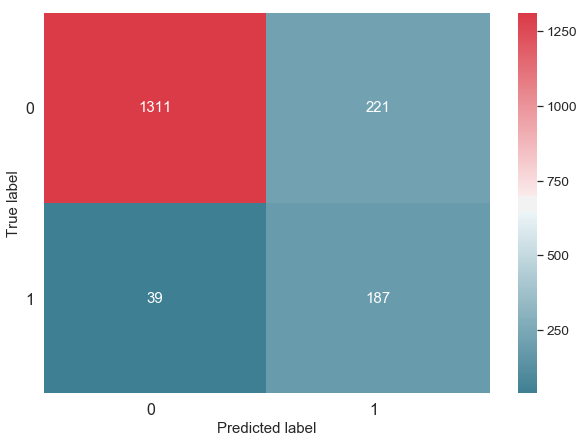

In [191]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [192]:
#Predict the Probabilities
pred_prob_0 = logreg.predict_proba(X_test_sdf)[:,0]
pred_prob_1 = logreg.predict_proba(X_test_sdf)[:,1]

In [193]:
#Put all information on a DataFrame for analysis
df_results = X_test.copy()
df_results["Monthly_Charges"] = h
df_results["Predicted_Class"] = y_pred
df_results["Predicted_Prob(0)"] = pred_prob_0
df_results["Predicted_Prob(1)"] = pred_prob_1

In [194]:
df_results.head()

,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Monthly_Charges,Predicted_Class,Predicted_Prob(0),Predicted_Prob(1)
4247,1,23,2,0,0,1130,1,0.24,0.76
2910,1,1,1,0,0,1840,1,0.49,0.51
1565,1,4,1,0,0,1980,1,0.49,0.51
5219,0,46,1,1,0,480,0,0.87,0.13
4420,1,23,0,1,0,1930,0,0.91,0.09


In [195]:
df_results = pd.concat([df_dum1, df_results, y_1], axis =1, join='inner')

In [196]:
df_results.head()

,Customer_ID,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Monthly_Charges,Predicted_Class,Predicted_Prob(0),Predicted_Prob(1),Churn
0,0002-ORFBO,North Luzon,Female,Yes,DSL,In-person,1,9,2,0,1,1310,0,0.57,0.43,0
6,0013-SMEOE,North Luzon,Female,Yes,Fiber,Bank transfer,0,71,1,1,1,2190,0,0.97,0.03,0
7,0014-BMAQU,North Luzon,Male,Yes,Fiber,Credit Card,0,63,1,1,1,1690,0,0.97,0.03,0
24,0031-PVLZI,National Capital Region,Female,Yes,No,In-person,1,4,0,0,0,410,0,0.77,0.23,0
30,0048-LUMLS,National Capital Region,Male,Yes,Fiber,Credit Card,0,37,0,0,1,1820,0,0.98,0.02,0


#### Saving Results

In [197]:
df_results.to_csv("df_results.csv")

### Getting Insights from the Predicted Classes and Churn

#### Storing Insights to Dataframes for Analysis

In [198]:
df_Not_Churn = df_results.loc[(df_results['Predicted_Class']== 0 ) | (df_results['Churn']== 0)]

In [199]:
df_Churn = df_results.loc[(df_results['Predicted_Class']== 1 ) | (df_results['Churn']== 1)]

In [200]:
df_Predicted_Churn = df_results.loc[(df_results['Predicted_Class']== 1 ) | (df_results['Churn']== 0)]

In [201]:
df_Predicted_Not_Churn = df_results.loc[(df_results['Predicted_Class']== 0 ) | (df_results['Churn']== 1)]

#### Saving each dataframes into Dataset

In [202]:
df_Churn.to_csv("df_Churn")

In [203]:
df_Predicted_Churn.to_csv("df_Predicted_Churn")

In [204]:
df_Not_Churn.to_csv("df_Not_Churn")

In [205]:
df_Predicted_Not_Churn.to_csv("df_Predicted_Not_Churn")

### Digging to each Result

#### Churned Customers

In [206]:
df_Churn.head()

,Customer_ID,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Monthly_Charges,Predicted_Class,Predicted_Prob(0),Predicted_Prob(1),Churn
54,0096-BXERS,Visayas,Female,Yes,DSL,In-person,1,6,1,0,0,1010,1,0.50,0.50,0
70,0115-TFERT,National Capital Region,Male,Yes,No,In-person,1,21,4,0,0,2220,1,0.02,0.98,1
74,0122-OAHPZ,National Capital Region,Female,Yes,No,In-person,1,7,2,0,0,1480,1,0.22,0.78,1
86,0137-UDEUO,Visayas,Female,Yes,No,In-person,1,3,2,0,0,400,1,0.21,0.79,0
92,0151-ONTOV,North Luzon,Female,Yes,Fiber,In-person,1,1,1,0,0,1420,1,0.49,0.51,0


In [207]:
df_Churn.shape

(447, 16)

In [208]:
df_Churn.describe()

,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Monthly_Charges,Predicted_Class,Predicted_Prob(0),Predicted_Prob(1),Churn
count,447.00,447.00,447.00,447.00,447.00,447.00,447.00,447.00,447.00,447.00
mean,0.81,15.26,2.69,0.11,0.06,1308.19,0.91,0.29,0.71,0.51
std,0.40,18.10,1.93,0.32,0.23,600.59,0.28,0.24,0.24,0.50
min,0.00,1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.01,0.00
25%,1.00,2.00,1.00,0.00,0.00,810.00,1.00,0.05,0.51,0.00
50%,1.00,7.00,2.00,0.00,0.00,1410.00,1.00,0.23,0.77,1.00
75%,1.00,24.00,4.00,0.00,0.00,1795.00,1.00,0.49,0.95,1.00
max,1.00,72.00,7.00,1.00,1.00,2350.00,1.00,0.99,1.00,1.00


In [209]:
df_Churn.Region.value_counts()

National Capital Region    154
North Luzon                108
Visayas                     86
South Luzon                 56
Mindanao                    43
Name: Region, dtype: int64

*North Luzon* and *National Capital Region* are the 
top regions having Customer Churns, with 
Luzon Area getting more than half of the total number. 

In [210]:
df_Churn.Tenure.value_counts()

1     98
2     36
3     30
4     28
5     18
7     15
6     13
8     11
14    10
9     10
17     9
11     8
13     8
37     7
10     7
58     7
18     6
24     6
12     5
25     5
34     5
47     5
22     4
15     4
26     4
31     4
33     4
35     4
21     4
55     4
56     4
69     4
42     4
16     3
57     3
32     3
29     3
20     3
43     3
48     3
44     2
19     2
49     2
45     2
23     2
36     2
41     2
39     2
46     2
38     2
50     1
51     1
53     1
54     1
27     1
71     1
40     1
59     1
60     1
62     1
63     1
64     1
68     1
28     1
72     1
Name: Tenure, dtype: int64

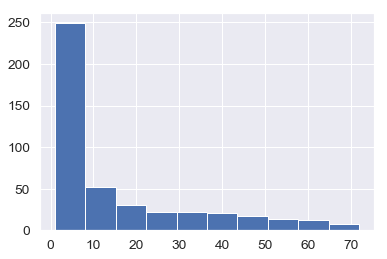

In [211]:
df_Churn.Tenure.hist()

Most Customers Churn after their first year, with 60% of the customers churn in a little less/after a year (1 year and 2 months at most), and more than 75% of it churning after 8 months. It is also to be noted that the more longer the subscriber is bound to the service, the less likely they will Churn, with even reaching 6 years before they churn.

In [212]:
df_Churn.Customer_Service_Calls.value_counts()

2    159
1    117
3     37
6     34
7     31
5     26
4     26
0     17
Name: Customer_Service_Calls, dtype: int64

Most Customers churns after 2 - 3 calls with Customer Service, with a little more than 61% of them churned after 1-2 calls, considering Filipinos not having too much patience in fixing issues and tend to avail other services.

In [213]:
df_Churn.Online_Security.value_counts()

0    396
1     51
Name: Online_Security, dtype: int64

88.5% of those who churned doesn't avail the security package.

In [214]:
df_Churn.Locked_In.value_counts()

0    422
1     25
Name: Locked_In, dtype: int64

94.5% of the Customers who churned doesn't also avail the Locked In penalty fee or it isn't included in their contract. Let's say that because of not having the Locked In penalty fee, it doesn't have anything that holds them in availing the service longer and therefore free to just churn around. Looking at a Filipino perspective, it would make sense since "walang bayad" naman or "walang fee" so "let's leave it at that".

In [215]:
df_Churn["Dominant_Payment_Method_In-person"].value_counts()

1    360
0     87
Name: Dominant_Payment_Method_In-person, dtype: int64

80.5% of the Customers who Churned are paying in-person, which in Filipino behavior, makes sense since you are not worried of your running bill when you either pay through credit card or bank transfer, having the habit of "pawalang-bahala" na lang.

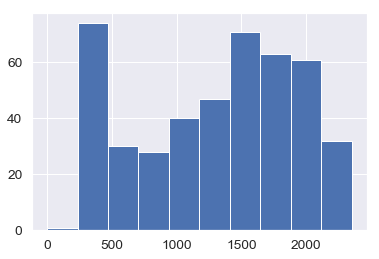

In [216]:
df_Churn.Monthly_Charges.hist()

Customers who churns are charged 400 to less than 2400 pesos a month. With less than 500 pesos monthly charge as the highest count of monthly charges, this amount can be considered as "small amount" and can be considered as something that they could also overlook when they decided to churn. 1,500 - 2,000 monthly charges can be considered also as payment of services packages so others usually churn when something about the service is not favorable to them, or also the monthly charge for them is considered high for them that they tend to delay its payment, leading to churn from it.

In [217]:
df_Churn.Gender.value_counts()

Male      226
Female    221
Name: Gender, dtype: int64

With a very little gap, Males are actually more prone to churn, with 50.8% than the Female's 49.2%. Considering this, those who churn are regardless of gender, and to think of today where everyone has an access to internet thru their mobile surfing plans, they find the latter more practical since it's on prepaid rather than the fixed monthly charges.

In [218]:
df_Churn.Internet_Service.value_counts()

Fiber    192
DSL      151
No       104
Name: Internet_Service, dtype: int64

Those who churn are those with Internet Services. Maybe there's something they found unfavorable with the connection or service that they would churn, regardless of having that internet service monthly charge. They may have found the data allotment and distribution so little, the signal strength being weak in their area and other related problems that they may resort to finding other internet service provider.

#### Loyal (Not-Churning) Customers

In [219]:
df_Not_Churn.head()

,Customer_ID,Region,Gender,Phone_Service,Internet_Service,Dominant_Payment_Method,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Monthly_Charges,Predicted_Class,Predicted_Prob(0),Predicted_Prob(1),Churn
0,0002-ORFBO,North Luzon,Female,Yes,DSL,In-person,1,9,2,0,1,1310,0,0.57,0.43,0
6,0013-SMEOE,North Luzon,Female,Yes,Fiber,Bank transfer,0,71,1,1,1,2190,0,0.97,0.03,0
7,0014-BMAQU,North Luzon,Male,Yes,Fiber,Credit Card,0,63,1,1,1,1690,0,0.97,0.03,0
24,0031-PVLZI,National Capital Region,Female,Yes,No,In-person,1,4,0,0,0,410,0,0.77,0.23,0
30,0048-LUMLS,National Capital Region,Male,Yes,Fiber,Credit Card,0,37,0,0,1,1820,0,0.98,0.02,0


In [220]:
df_Not_Churn.shape

(1571, 16)

In [221]:
df_Not_Churn.describe()

,Dominant_Payment_Method_In-person,Tenure,Customer_Service_Calls,Online_Security,Locked_In,Monthly_Charges,Predicted_Class,Predicted_Prob(0),Predicted_Prob(1),Churn
count,1571.00,1571.00,1571.00,1571.00,1571.00,1571.00,1571.00,1571.00,1571.00,1571.00
mean,0.43,35.01,0.98,0.44,0.50,1274.57,0.14,0.78,0.22,0.02
std,0.50,24.36,0.71,0.50,0.50,603.92,0.35,0.21,0.21,0.16
min,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.21,0.01,0.00
25%,0.00,12.00,0.00,0.00,0.00,690.00,0.00,0.65,0.05,0.00
50%,0.00,33.00,1.00,0.00,1.00,1400.00,0.00,0.86,0.14,0.00
75%,1.00,58.00,1.00,1.00,1.00,1780.00,0.00,0.95,0.35,0.00
max,1.00,72.00,3.00,1.00,1.00,2380.00,1.00,0.99,0.79,1.00


In [222]:
df_Not_Churn.Region.value_counts()

National Capital Region    505
North Luzon                399
Visayas                    320
South Luzon                203
Mindanao                   144
Name: Region, dtype: int64

*North Luzon* and *National Capital Region* are the top regions also not having Customer Churns, with Luzon Area getting more than half of the total number. 

In [223]:
df_Not_Churn.Tenure.value_counts()

1     116
72    100
3      40
2      39
4      36
71     35
70     29
10     28
65     28
64     28
17     26
24     25
69     25
8      24
35     24
11     23
22     23
56     23
6      23
68     22
25     22
7      22
23     21
67     21
14     20
63     20
51     19
47     19
31     19
34     19
60     19
29     19
20     19
43     19
62     18
52     18
9      18
15     18
33     18
16     18
5      18
46     18
26     18
28     17
58     17
66     17
41     17
42     17
50     17
27     16
61     16
37     16
21     16
18     16
32     16
13     15
48     15
19     15
54     15
55     14
12     14
59     14
57     13
30     13
45     13
53     12
40     12
38     12
39     11
36      9
49      9
44      8
0       2
Name: Tenure, dtype: int64

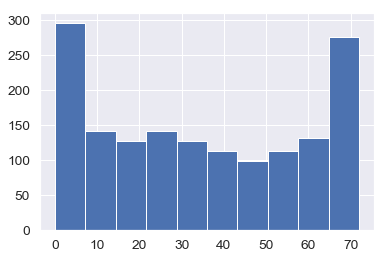

In [224]:
df_Not_Churn.Tenure.hist()

Most customers doesn't churn from the 1st month,as they would consider it as their experimental month, and possibility of reaching it 6 years and beyond to continue liking the service. It is also to be noted that the more longer the subscriber is bound to the service, the less likely they will Churn.It is also to be take note of that as the month goes longer, it also shows that availing the services flows steadily through the years.

In [225]:
df_Not_Churn.Customer_Service_Calls.value_counts()

1    776
0    413
2    380
3      2
Name: Customer_Service_Calls, dtype: int64

Loyal Customers mostly takes 1-2 calls or no calls at all in Customer Service in order to raise questions, have complaints or ask for help in their service / device. Contrasting to at most 7 calls of the Customers who churned, most likely that these loyal customers may have solve their problems or seem happy with the service that less calls were recorded. We could conclude that the less calls a customer took means less problems regarding with the service and therefore, satisfaction on the service availed.

In [226]:
df_Not_Churn.Online_Security.value_counts()

0    874
1    697
Name: Online_Security, dtype: int64

55.6% of the Loyal Customers doesn't have the Online Security Package but it's also taken note that unlike the Churned Customers, there's no huge gap here between those who have Online Security but those who haven't. It means that the other half was actually loyal customers for having the Online Security package also.

In [227]:
df_Not_Churn.Locked_In.value_counts()

1    788
0    783
Name: Locked_In, dtype: int64

50.2% of the Customers who haven't churned also avail the Locked In penalty fee or it is included in their contract. Same explanation applies where because of the Locked In fee that others continue to avail the services. With this, the availment of other services can be considered a way to reduce the churn and retain the customers. Also, there is no huge gap of percentage between those who does not have a Locked In.

In [228]:
df_Not_Churn["Dominant_Payment_Method_In-person"].value_counts()

0    890
1    681
Name: Dominant_Payment_Method_In-person, dtype: int64

Almost 56.7% of the Customers who continued the services are not paying in-person, which make sense for us Filipinos since we don't have to worry over paying in-person for the account will just be transferred to the bank or just with the credit card. With the ease of convenience nowadays, most would like to just instantly pay bills and therefore making the usage of the services stay.

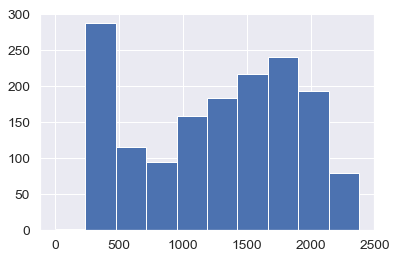

In [229]:
df_Not_Churn.Monthly_Charges.hist()

In [230]:
df_Not_Churn.Monthly_Charges.value_counts()

 400     93
 390     83
 410     63
 1400    27
 500     24
 1410    24
 380     24
 1610    23
 1600    22
 1700    21
 1710    20
 510     18
 1790    18
 1800    17
 1490    17
 1690    16
 1590    16
 900     16
 910     16
 1010    16
 2080    16
 1020    16
 2000    16
 420     16
 1390    15
 1000    14
 490     14
 1100    14
 1890    14
 1820    14
 1900    14
 1620    13
 480     13
 1380    13
 1500    13
 1720    12
 2090    12
 1920    12
 1990    12
 1580    12
 1910    12
 2110    11
 1980    11
 980     11
 1470    11
 2010    11
 1210    11
 1680    11
 1810    11
 520     10
         ..
 1160     3
 1150     3
 1140     3
 1330     3
 1340     3
 1430     3
 1440     3
 1450     3
 870      3
 770      3
 1870     3
 2350     3
 370      2
 2160     2
 2310     2
 1250     2
-1        2
 570      2
 840      2
 610      2
 1550     2
 930      2
 580      2
 790      2
 820      2
 1060     2
 1360     2
 430      2
 1850     2
 1260     2
 950      1
 1950     1
 127

Same with the customers who churned where charged 400 to less than 2400 pesos a month. With less than 500 pesos monthly charge as the highest count of monthly charges, this amount can be considered as "small amount" but unlike with the churned customers, it can be considered as something that they could just pay quickly.

In [231]:
df_Not_Churn.Gender.value_counts()

Male      791
Female    780
Name: Gender, dtype: int64

With a very little gap, Almost 50.4% Males are actually also more prone not to churn, with 50.8% than the Female's 49.4%. 

In [232]:
df_Not_Churn.Internet_Service.value_counts()

Fiber    636
DSL      525
No       410
Name: Internet_Service, dtype: int64

Most of those who never churned have been bounded by their internet service such as Fiber and DSL. With this, we could also concluded that those who also avail the Internet services also get to retain to avail the services.